# Importing Libraries and Data

In [1]:
# Importing the NumPy and Pandas packages

# Import data manipulation libraries
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import (
    classification_report,
    recall_score,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    precision_recall_curve,
    confusion_matrix,
)

# Set Pandas display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 200)

#Supress Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning, module="statsmodels")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing the "Leads" Dataset

In [2]:
# Reading the dataset
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking the shape
df.shape

(9240, 37)

# Data Understanding and Inspection

In [4]:
#Checking different columns
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Checking the info to see the types of the feature variables and the null values present

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning and Preparation

# Check and correct missing values

In [7]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

It is evident that numerous columns in the dataset contain a substantial number of missing values. These columns appear to lack utility due to their significant data gaps. Given that our dataframe comprises 9000 data points, we can confidently remove any columns with more than 3000 missing values, as they offer little value to our analysis.

In [8]:
#Dropping all the columns having more than 3000 null values.
threshold = 3000  # Define the threshold for missing values
columns_to_drop = [col for col in df.columns if df[col].isnull().sum() > threshold]

df.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [10]:
# Now lets check the column with highest null values.
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Considering that the variable "What matters most to you in choosing a course" is overwhelmingly dominated by the level "Better Career Prospects," which appears 6528 times, while the other two levels occur only once, it is advisable to remove this column from the dataset.

In [11]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [12]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Lead Profile                                2709
What is your current occupation             2690
Country                                     2461
How did you hear about X Education          2207
Specialization                              1438
City                                        1420
Page Views Per Visit                         137
TotalVisits                                  137
Last Activity                                103
Lead Source                                   36
Through Recommendations                        0
Receive More Updates About Our Courses         0
Update me on Supply Chain Content              0
Prospect ID                                    0
Newspaper                                      0
Get updates on DM Content                      0
I agree to pay the amount through cheque       0
A free copy of Mastering The Interview         0
Digital Advertisement                          0
Search                                         0
X Education Forums  

In [13]:
# Now lets check the column with highest null values.
df['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Indeed, the 'Lead Profile' column contains many rows with the values 'Select' and null, which don't provide meaningful information for our analysis. Therefore, it's advisable to remove these rows to clean and streamline the dataset for more effective analysis.

In [14]:
df.drop(['Lead Profile'], axis = 1, inplace=True)

In [15]:
#Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

What is your current occupation             2690
Country                                     2461
How did you hear about X Education          2207
Specialization                              1438
City                                        1420
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Get updates on DM Content                      0
Update me on Supply Chain Content              0
X Education Forums                             0
I agree to pay the amount through cheque       0
A free copy of Mastering The Interview         0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Digital Advertisement                          0
Newspaper                                      0
Prospect ID                                    0
Newspaper Article                              0
Magazine            

In [16]:
# Now lets check the column with highest null values.
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [17]:
#Lets check the above column in percentages for better insight.
occupation_counts = df['What is your current occupation'].value_counts(normalize=True) * 100
print(occupation_counts)

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64


Imputing the missing values with 'Unemployed' is a reasonable approach since it is the most frequent category. This is especially significant from a business perspective because, in the context of X Education selling online courses, individuals who are currently unemployed may be more inclined to take these courses as a means to enhance their employability.

In [18]:
imputed_values = {'What is your current occupation': 'Unemployed'}
df = df.fillna(value=imputed_values)

In [19]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Country                                     2461
How did you hear about X Education          2207
Specialization                              1438
City                                        1420
Page Views Per Visit                         137
TotalVisits                                  137
Last Activity                                103
Lead Source                                   36
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Prospect ID                                    0
X Education Forums                             0
Update me on Supply Chain Content              0
Get updates on DM Content                      0
I agree to pay the amount through cheque       0
A free copy of Mastering The Interview         0
Newspaper                                      0
What is your current occupation                0
Newspaper Article                              0
Magazine            

In [20]:
# Now lets check the column with highest null values.
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [21]:
#Lets check the above column in percentages for better insight.
occupation_counts = df['Country'].value_counts(normalize=True) * 100
print(occupation_counts)

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

Given that approximately 96% of the customers of X Education are from India, it doesn't currently align with the business strategy to impute missing values with 'India.' Consequently, it makes sense to consider removing the 'Country' column from the dataset.

In [22]:
df.drop(['Country'], axis = 1, inplace=True)

In [23]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education          2207
Specialization                              1438
City                                        1420
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Prospect ID                                    0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Update me on Supply Chain Content              0
X Education Forums                             0
Get updates on DM Content                      0
I agree to pay the amount through cheque       0
A free copy of Mastering The Interview         0
Newspaper                                      0
Search                                         0
Newspaper Article                              0
Magazine                                       0
Lead Number         

#Checking and correcting the "Select" Values

As mentioned in the Problem Statement, many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. The reason is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select.

In [24]:
cols_with_select_value = [col for col in df.columns if (df[col] == 'Select').any()]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'City']


In [25]:
# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [26]:
# Check if there are any 'Select' values left in the DataFrame
all_select_values_handled = not df.isin(['Select']).any().any()

if all_select_values_handled:
    print("All 'Select' values have been handled in the columns.")
else:
    print("Some 'Select' values are still present in the columns.")


All 'Select' values have been handled in the columns.


#Now, there are no "Select" values in the dataframe df.

In [27]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education          7250
City                                        3669
Specialization                              3380
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Prospect ID                                    0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Update me on Supply Chain Content              0
X Education Forums                             0
Get updates on DM Content                      0
I agree to pay the amount through cheque       0
A free copy of Mastering The Interview         0
Newspaper                                      0
Search                                         0
Newspaper Article                              0
Magazine                                       0
Lead Number         

Absolutely, since the 'How did you hear about X Education' column contains many rows with the value 'Select,' which doesn't contribute valuable information to our analysis, it's a good idea to drop these rows to enhance the dataset's relevance for further analysis.

In [28]:
df.drop(['How did you hear about X Education'], axis = 1, inplace=True)

In [29]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

City                                        3669
Specialization                              3380
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Prospect ID                                    0
X Education Forums                             0
A free copy of Mastering The Interview         0
I agree to pay the amount through cheque       0
Get updates on DM Content                      0
Update me on Supply Chain Content              0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Digital Advertisement                          0
Newspaper                                      0
Search                                         0
Newspaper Article                              0
Magazine                                       0
Lead Number                                    0
What is your current

In [30]:
# Now lets check the column with highest null values.
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

As it appears, the 'City' variable won't provide significant value in our analysis, given that the maximum occurrence is either 'Mumbai' or null. Therefore, it's advisable to proceed with dropping this variable from the dataset.

In [31]:
df.drop(['City'], axis = 1, inplace=True)

In [32]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Specialization                              3380
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Prospect ID                                    0
X Education Forums                             0
A free copy of Mastering The Interview         0
I agree to pay the amount through cheque       0
Get updates on DM Content                      0
Update me on Supply Chain Content              0
Receive More Updates About Our Courses         0
Through Recommendations                        0
Digital Advertisement                          0
Newspaper                                      0
Search                                         0
Newspaper Article                              0
Magazine                                       0
Lead Number                                    0
What is your current occupation                0
Total Time Spent on 

In [33]:
# Now lets check the column with highest null values.
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Certainly, since the 'Specialization' column contains around 36% null values, and we have already removed several feature variables, it's a reasonable decision not to drop the entire column. Instead, we can drop the rows with null values in the 'Specialization' column and try to retain as much data as possible for potential analysis.

In [34]:
df = df[~pd.isnull(df['Specialization'])]

In [35]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

TotalVisits                                 61
Page Views Per Visit                        61
Last Activity                               49
Lead Source                                  8
Prospect ID                                  0
Newspaper Article                            0
A free copy of Mastering The Interview       0
I agree to pay the amount through cheque     0
Get updates on DM Content                    0
Update me on Supply Chain Content            0
Receive More Updates About Our Courses       0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
X Education Forums                           0
Search                                       0
Magazine                                     0
Lead Number                                  0
What is your current occupation              0
Specialization                               0
Total Time Spent on Website                  0
Converted    

In [36]:
# TotalVisits missing values to be imputed with mode
df['TotalVisits'].fillna(df['TotalVisits'].mode()[0], inplace=True)

In [37]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Page Views Per Visit                        61
Last Activity                               49
Lead Source                                  8
Prospect ID                                  0
Newspaper Article                            0
A free copy of Mastering The Interview       0
I agree to pay the amount through cheque     0
Get updates on DM Content                    0
Update me on Supply Chain Content            0
Receive More Updates About Our Courses       0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
X Education Forums                           0
Search                                       0
Magazine                                     0
Lead Number                                  0
What is your current occupation              0
Specialization                               0
Total Time Spent on Website                  0
TotalVisits                                  0
Converted    

In [38]:
# Now lets check the column with highest null values.
df['Page Views Per Visit'].value_counts(dropna=False)

2.00    1311
3.00     976
4.00     792
0.00     475
5.00     453
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 106, dtype: int64

In [39]:
# TotalVisits missing values to be imputed with mode
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0], inplace=True)

In [40]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Last Activity                               49
Lead Source                                  8
Prospect ID                                  0
Magazine                                     0
A free copy of Mastering The Interview       0
I agree to pay the amount through cheque     0
Get updates on DM Content                    0
Update me on Supply Chain Content            0
Receive More Updates About Our Courses       0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
X Education Forums                           0
Newspaper Article                            0
Search                                       0
Lead Number                                  0
What is your current occupation              0
Specialization                               0
Page Views Per Visit                         0
Total Time Spent on Website                  0
TotalVisits                                  0
Converted    

In [41]:
# Now lets check the column with highest null values.
df['Last Activity'].value_counts(dropna=False)

Email Opened                    2345
SMS Sent                        1938
Page Visited on Website          488
Converted to Lead                267
Email Bounced                    210
Email Link Clicked               150
Olark Chat Conversation          146
Form Submitted on Website        114
Unreachable                       73
NaN                               49
Unsubscribed                      45
Had a Phone Conversation          24
View in browser link Clicked       3
Approached upfront                 3
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [42]:
# TotalVisits missing values to be imputed with mode
df['Last Activity'].fillna(df['Last Activity'].mode()[0], inplace=True)

In [43]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Lead Source                                 8
Prospect ID                                 0
Magazine                                    0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Search                                      0
Lead Number                                 0
What is your current occupation             0
Specialization                              0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                         

In [44]:
# Now lets check the column with highest null values.
df['Lead Source'].value_counts(dropna=False)

Direct Traffic       2381
Google               1969
Organic Search        787
Reference             390
Olark Chat            242
Referral Sites         35
Facebook               16
Welingak Website       15
NaN                     8
Click2call              4
Press_Release           2
bing                    2
Social Media            2
WeLearn                 1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
testone                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [45]:
# TotalVisits missing values to be imputed with mode
df['Lead Source'].fillna(df['Lead Source'].mode()[0], inplace=True)

In [46]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Prospect ID                                 0
Lead Number                                 0
A free copy of Mastering The Interview      0
I agree to pay the amount through cheque    0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Magazine                                    0
Search                                      0
What is your current occupation             0
Specialization                              0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                                   0
Do Not Call                       

Now that we've handled the missing values and removed rows with null values and Select, it's a good idea to check the percentage of rows that we have retained from the original dataset. You can calculate this by comparing the number of rows in the cleaned dataset to the number of rows in the original dataset and expressing it as a percentage:

In [47]:
# Calculate and print the number of rows in xleads
print(len(df.index))

# Calculate and print the percentage of rows in xleads relative to the original dataset
print(len(df.index) / 9240)

5860
0.6341991341991342


63% of data is retained after handling missing values and data cleaning, This should provide a solid foundation for meaningful insights and modeling in our analysis.

In [48]:
# Let's look at the dataset again

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened


Certainly, if the variables 'Prospect ID' and 'Lead Number' do not hold any significant relevance or utility for our analysis, it's a sensible decision to drop these two variables to simplify the dataset and remove unnecessary features.

In [49]:
columns_to_drop = ['Prospect ID', 'Lead Number']
df.drop(columns=columns_to_drop, inplace=True)

In [50]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened


In [51]:
#check for columns with one unique value, count and freq is same

df.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,5860,5860,5860,5860,5860,5860,5860,5860,5860,5860,5860,5860,5860,5860,5860,5860,5860,5860,5860,5860
unique,5,19,2,2,16,18,6,2,1,2,2,2,2,2,1,1,1,1,2,15
top,Landing Page Submission,Direct Traffic,No,No,Email Opened,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
freq,4761,2389,5349,5858,2394,976,5029,5850,5860,5859,5859,5859,5857,5854,5860,5860,5860,5860,2978,1975


Certainly, based on the information provided, the following columns have only one unique value and can be considered for removal as they do not provide meaningful variation in responses:

'I agree to pay the amount through cheque'

'Get updates on DM Content'

'Update me on Supply Chain Content'

'Receive More Updates About Our Courses'

'Magazine'

You can drop these columns from your DataFrame using the drop method as follows:

In [52]:
cols_to_drop = ['Magazine', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content',
                'Get updates on DM Content',
                'I agree to pay the amount through cheque']

print("Before Dropping Columns:", df.shape)
df.drop(cols_to_drop, axis=1, inplace=True)
print("After Dropping Columns:", df.shape)

Before Dropping Columns: (5860, 24)
After Dropping Columns: (5860, 19)


# Checking & Dropping Category Columns that are Skewed

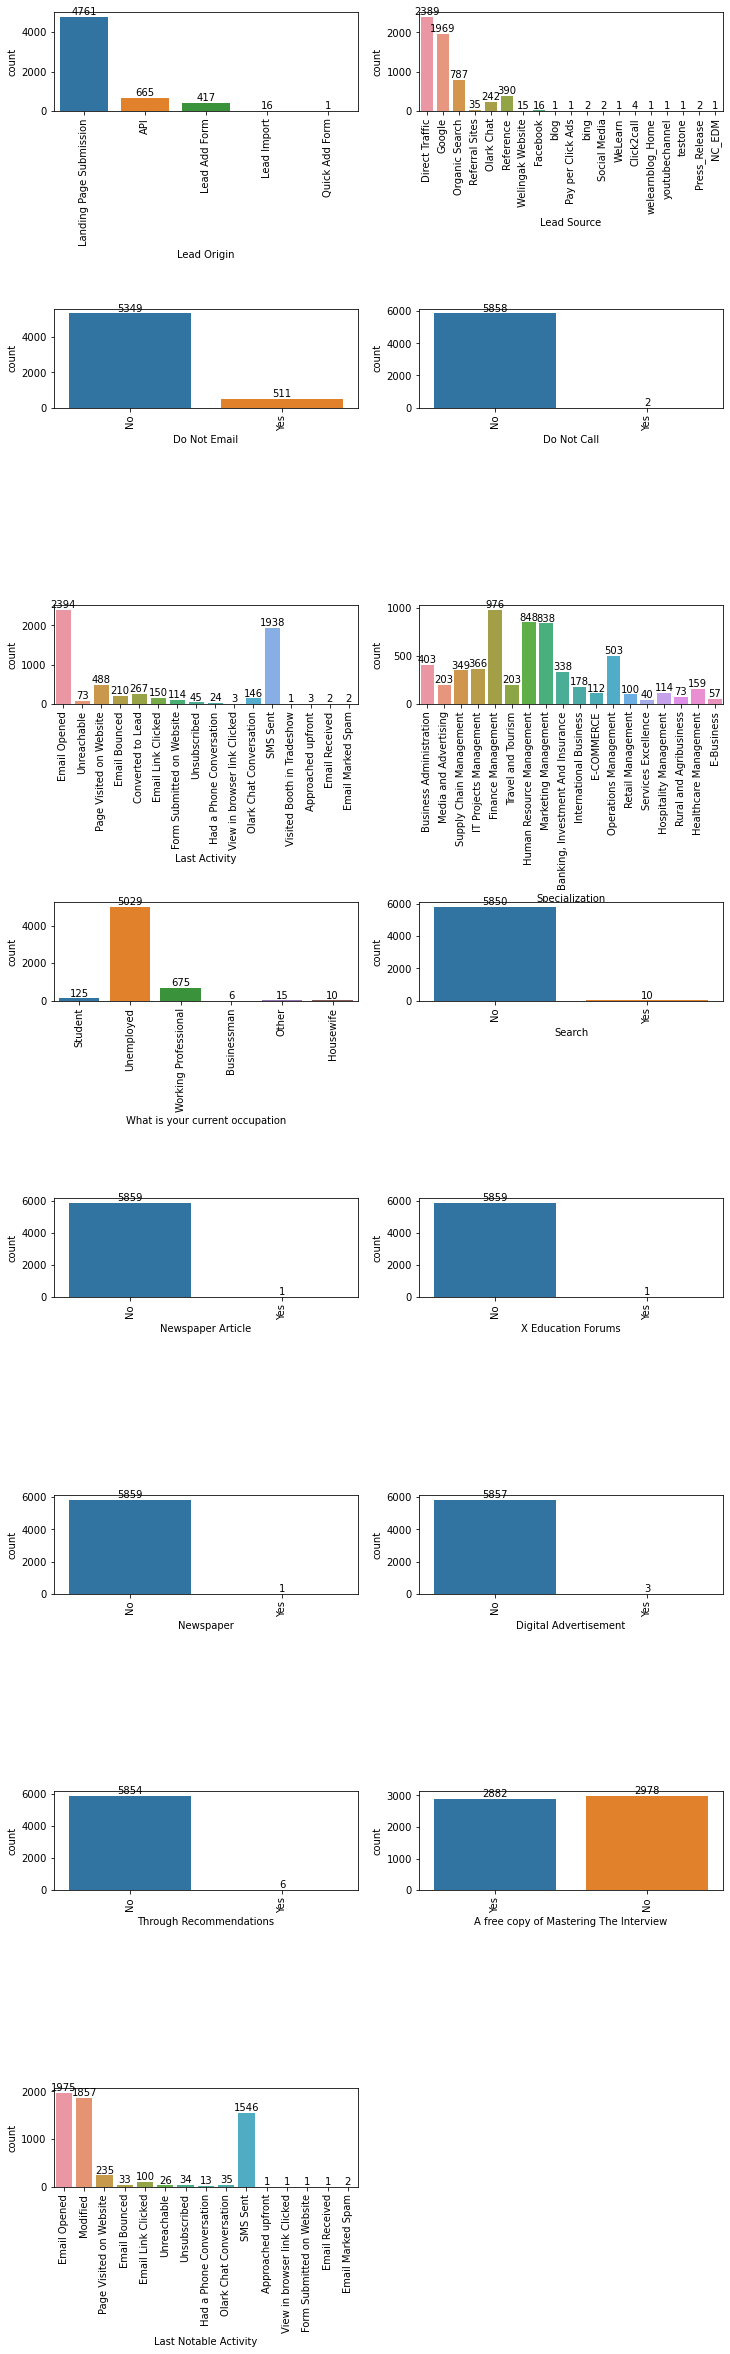

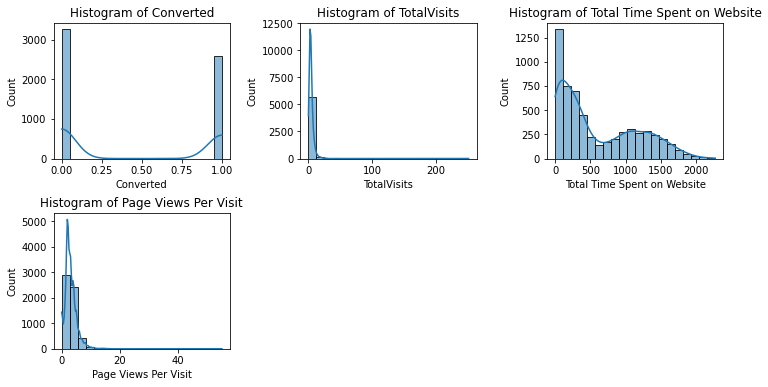

In [53]:
# Get categorical and numerical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Plot countplots for categorical columns
plt.figure(figsize=(12, 40))
plt.subplots_adjust(wspace=.2, hspace=2)

for i, col in enumerate(categorical_cols):
    plt.subplot(8, 2, i + 1)
    ax = sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot histograms for numerical columns
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=.4, hspace=0.4)

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')

plt.show()

considering that these columns contain highly skewed data, it's a prudent decision to exclude them from the analysis. Highly skewed variables can introduce bias and inaccuracies into logistic regression models. Therefore, we will drop the following columns from our dataset:

'Do Not Call'

'Search'

'Newspaper Article'

'X Education Forums'

'Newspaper'

'Digital Advertisement'

'Through Recommendations'

By removing these columns, we aim to enhance the model's performance and the quality of our analysis.

In [54]:
skewed_columns = [
    'Do Not Call',
    'Search',
    'Newspaper Article',
    'X Education Forums',
    'Newspaper',
    'Digital Advertisement',
    'Through Recommendations'
]
print("Before Drop: ",df.shape)
df.drop(columns=skewed_columns, inplace=True)
print("After Drop: ",df.shape)

Before Drop:  (5860, 19)
After Drop:  (5860, 12)


In [55]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,No,Modified
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,Yes,Email Opened
9,API,Google,No,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,No,Email Opened


In [56]:
# Now lets check the column "Last Notable Activity"
df['Last Notable Activity'].value_counts(dropna=False)

Email Opened                    1975
Modified                        1857
SMS Sent                        1546
Page Visited on Website          235
Email Link Clicked               100
Olark Chat Conversation           35
Unsubscribed                      34
Email Bounced                     33
Unreachable                       26
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

"Last Notable Activity"is of no use for modeling

In [57]:
# Dropping Column
print("Before Dropping Columns",df.shape)
df.drop(['Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df.shape)

Before Dropping Columns (5860, 12)
After Dropping Columns (5860, 11)


In [58]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,No
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,Yes
9,API,Google,No,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,No


# Outlier Analysis

In [59]:
def check_outliers(data, column_list):
    num_cols = len(column_list)
    
    plt.figure(figsize=(15, 6 * num_cols))
    
    for i, col in enumerate(column_list):
        plt.subplot(num_cols, 1, i + 1)
        
        sns.boxplot(y=data[col], color='skyblue')
        plt.title(f'Outliers in {col}', fontsize=14)
        plt.xlabel(None)
    
    plt.suptitle("Checking Outliers using Boxplot", fontsize=20, color="green")
    plt.tight_layout()
    plt.show()

In [60]:
def Check_Outliers(data, column_list):
    num_cols = len(column_list)
    
    plt.figure(figsize=(15, 6 * num_cols))
    
    for i, col in enumerate(column_list):
        plt.subplot(num_cols, 1, i + 1)
        
        sns.boxplot(x=data[col], color='skyblue')
        plt.title(f'Outliers in {col}', fontsize=14)
    
    plt.suptitle("Checking Outliers using Boxplot", fontsize=20, color="green")
    plt.tight_layout()
    plt.show()

# List of numerical columns to check for outliers
num_cols = ["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]

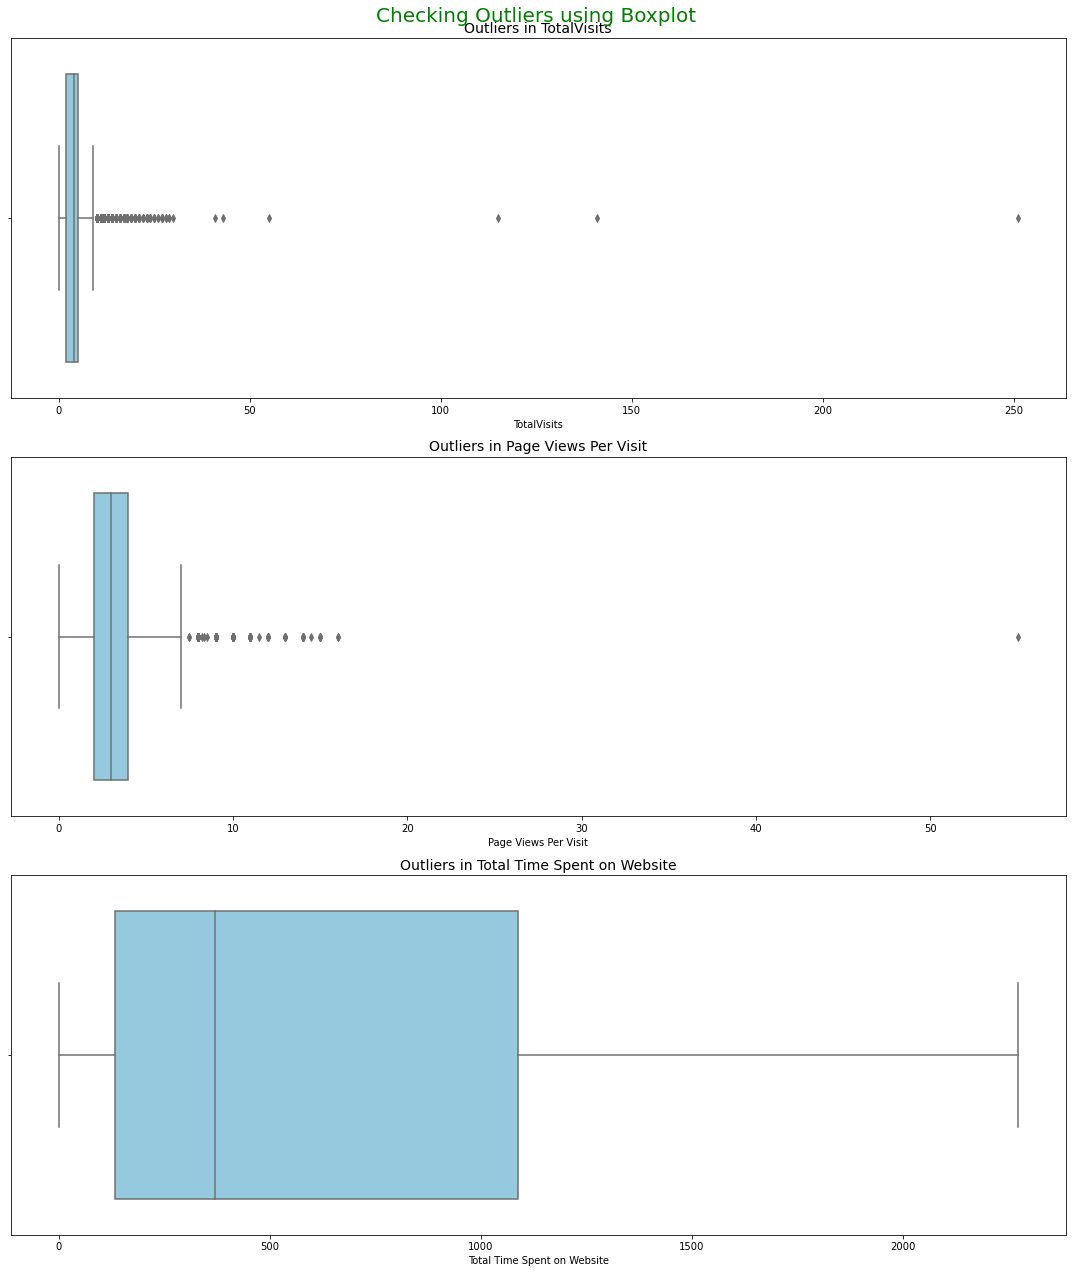

In [61]:
Check_Outliers(df,num_cols)

"TotalVisits" and "Page Views Per Visit" both exhibit outliers, as evident from the boxplots. Hence, it is necessary to address and handle these outliers in these specific variables.

In [62]:
# before outlier treatment
df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5860.000000,5860.000000,5860.000000,5860.000000
mean,0.442321,4.353413,607.197782,3.013116
std,0.496704,5.338724,556.198478,2.096796
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,1.000000,14.000000,1.000000
25%,0.000000,2.000000,132.750000,2.000000
50%,0.000000,4.000000,369.500000,3.000000
75%,1.000000,5.000000,1087.250000,4.000000
95%,1.000000,11.000000,1614.200000,7.000000
max,1.000000,251.000000,2272.000000,55.000000


In [63]:
def Outlier_treatment(df, column_list):
    for column in column_list:
        q1 = df[column].describe()["25%"]
        q3 = df[column].describe()["75%"]
        iqr = q3 - q1

        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr

        # Capping upper-bound outliers
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

        # Flooring lower-bound outliers
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])


# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(df,capping_cols)

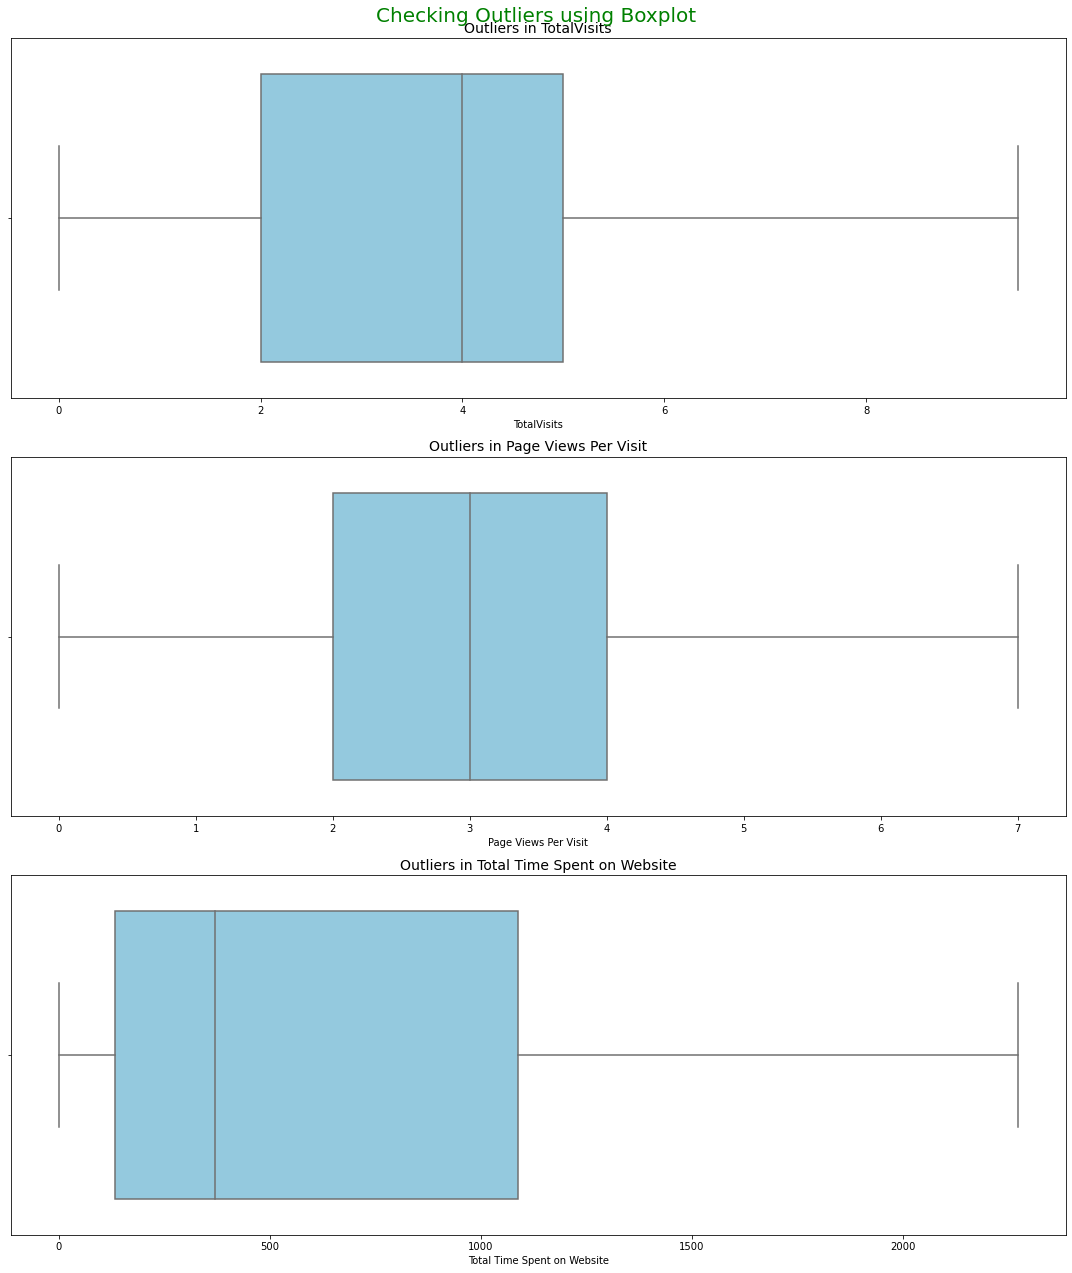

In [64]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(df,num_cols)

In [65]:
# after outlier treatment detailed percentile values
df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5860.000000,5860.000000,5860.000000,5860.000000
mean,0.442321,3.976706,607.197782,2.926932
std,0.496704,2.562999,556.198478,1.730538
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,1.000000,14.000000,1.000000
25%,0.000000,2.000000,132.750000,2.000000
50%,0.000000,4.000000,369.500000,3.000000
75%,1.000000,5.000000,1087.250000,4.000000
95%,1.000000,9.500000,1614.200000,7.000000
max,1.000000,9.500000,2272.000000,7.000000


To rectify erroneous values and normalize data within columns, we'll first examine whether the entries conform to the expected format and data types. We'll also address any inconsistencies in text casing styles, ensuring uniformity (either all in uppercase or lowercase) throughout the dataset. This comprehensive process aims to enhance data quality and consistency.

In [66]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,No
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,Yes
9,API,Google,No,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,No


In [67]:
##Categorical values

columns_list_cat = ["Lead Origin", "Lead Source", "Do Not Email", "Last Activity", "Specialization",
                    "What is your current occupation", "A free copy of Mastering The Interview"]

for column in columns_list_cat:
    percentages = 100 * df[column].value_counts(normalize=True)
    print("Value Counts % for:", column, "\n")
    print(percentages, "\n")
    print("_^_" * 40, "\n")

Value Counts % for: Lead Origin 

Landing Page Submission    81.245734
API                        11.348123
Lead Add Form               7.116041
Lead Import                 0.273038
Quick Add Form              0.017065
Name: Lead Origin, dtype: float64 

_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_ 

Value Counts % for: Lead Source 

Direct Traffic       40.767918
Google               33.600683
Organic Search       13.430034
Reference             6.655290
Olark Chat            4.129693
Referral Sites        0.597270
Facebook              0.273038
Welingak Website      0.255973
Click2call            0.068259
Press_Release         0.034130
bing                  0.034130
Social Media          0.034130
youtubechannel        0.017065
testone               0.017065
Pay per Click Ads     0.017065
welearnblog_Home      0.017065
WeLearn               0.017065
blog                  0.017065
NC_EDM                0.017065

We've observed that certain categories or levels in the "Lead Source" and "Last Activity" columns have limited records. To streamline our data and avoid excessive dummy variables, we intend to group these categories into a single category labeled "Others," ensuring a more organized representation.

In [68]:
low_frequency_sources = ["bing", "Click2call", "Press_Release",
                         "Social Media", "Live Chat", "youtubechannel",
                         "testone", "Pay per Click Ads", "welearnblog_Home",
                         "WeLearn", "blog", "NC_EDM"]

df['Lead Source'] = df['Lead Source'].replace(low_frequency_sources, "Others")

In [69]:
# value_counts percentage after replace
df["Lead Source"].value_counts(normalize=True)*100

Direct Traffic      40.767918
Google              33.600683
Organic Search      13.430034
Reference            6.655290
Olark Chat           4.129693
Referral Sites       0.597270
Others               0.290102
Facebook             0.273038
Welingak Website     0.255973
Name: Lead Source, dtype: float64

In [70]:
# Grouping low frequency value levels to Others 
low_frequency_activities = ['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 
                            'Approached upfront', 'View in browser link Clicked', 
                            'Email Marked Spam', 'Email Received', 'Visited Booth in Tradeshow', 
                            'Resubscribed to emails']

df['Last Activity'] = df['Last Activity'].replace(low_frequency_activities, 'Others')


In [71]:
# value_counts percentage after replace
df["Last Activity"].value_counts(normalize=True)*100

Email Opened                 40.853242
SMS Sent                     33.071672
Page Visited on Website       8.327645
Converted to Lead             4.556314
Email Bounced                 3.583618
Others                        2.610922
Email Link Clicked            2.559727
Olark Chat Conversation       2.491468
Form Submitted on Website     1.945392
Name: Last Activity, dtype: float64

In [72]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,No
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,Yes
9,API,Google,No,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,No


Renaming the columns

In [73]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

In [74]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,No
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,No
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,Yes
9,API,Google,No,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,No


For the binary categorical columns "Do Not Email" and "Free_copy," we will perform value mapping, changing "Yes" to 1 and "No" to 0. This mapping will convert these columns into binary numeric variables, where 1 represents "Yes" and 0 represents "No."

In [75]:
# Mapping 'Yes' to 1 and 'No' to 0 for binary categorical columns
df['Do Not Email'] = df['Do Not Email'].map({'Yes': 1, 'No': 0})
df['Free_copy'] = df['Free_copy'].map({'Yes': 1, 'No': 0})

In [76]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,0
8,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,1
9,API,Google,0,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,0


In [77]:
#Checking data types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860 entries, 2 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  5860 non-null   object 
 1   Lead Source                  5860 non-null   object 
 2   Do Not Email                 5860 non-null   int64  
 3   Converted                    5860 non-null   int64  
 4   TotalVisits                  5860 non-null   float64
 5   Total Time Spent on Website  5860 non-null   int64  
 6   Page Views Per Visit         5860 non-null   float64
 7   Last Activity                5860 non-null   object 
 8   Specialization               5860 non-null   object 
 9   Current_occupation           5860 non-null   object 
 10  Free_copy                    5860 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 549.4+ KB


The data types appear to be appropriate, and no further adjustments are required.

# EDA(Data Analysis)

Checking for data imbalance is an important step in data analysis, especially when dealing with a binary classification problem.  Data imbalance occurs when there is an unequal distribution of observations between the two classes of the target variable.

In this case, the target variable is 'Converted,' which indicates whether a past lead was converted (1) or not converted (0). To assess data imbalance, we need to calculate and compare the frequencies or proportions of both classes in the target variable

In [78]:
# Calculate the count of each class in the 'Converted' variable
converted_counts = df['Converted'].value_counts()

# Calculate the proportion of each class
converted_proportions = converted_counts / len(df)

# Display the results
print("Class Counts:")
print(converted_counts)

print("\nClass Proportions:")
print(converted_proportions)

Class Counts:
0    3268
1    2592
Name: Converted, dtype: int64

Class Proportions:
0    0.557679
1    0.442321
Name: Converted, dtype: float64


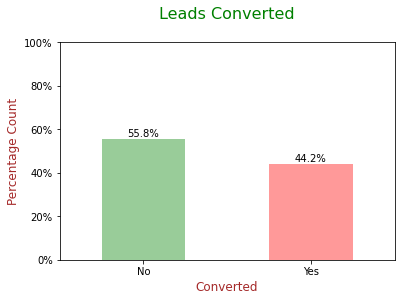

In [79]:
a = (100 * df["Converted"].value_counts(normalize=True)).plot.bar(color=["Green", "Red"], alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight': 12, 'color': 'Green'})

# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'Brown'})

# Modification of ticks on the y-axis
ticks = np.arange(0, 101, 20)
labels = ["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks, labels)

# xticks
plt.xticks([0, 1], ["No", "Yes"])
plt.xticks(rotation=0)

for p in a.patches:
    a.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

<strong><span style="color:purple">Key Insights:</span></strong>

The conversion rate is approximately 44.2%, indicating that only a minority of individuals, about 44.2%, have converted into leads.

Conversely, the majority, accounting for 55.8%, did not convert into leads.

In [80]:
### Ratio of Data Imbalance
ratio=(df["Converted"].value_counts(normalize=True).loc[0])/(df["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.26 : 1


# Univariate Analysis

In [81]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,0
8,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,1
9,API,Google,0,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,0


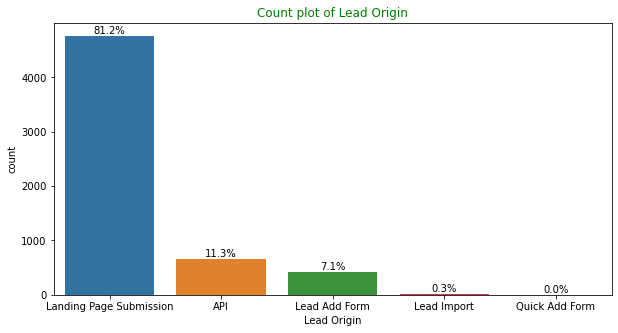

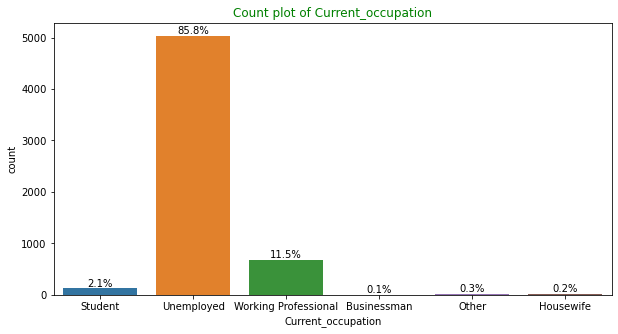

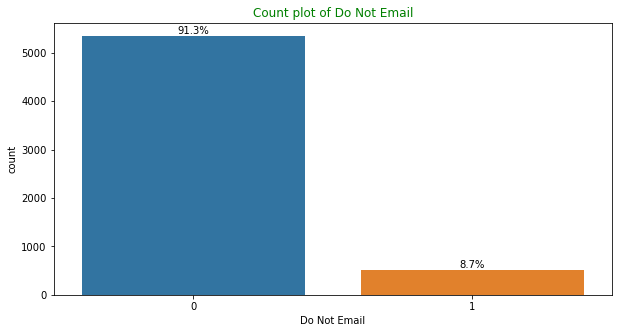

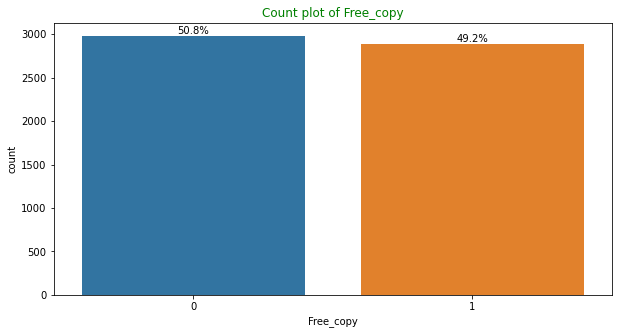

In [82]:
# List of categorical columns
c_cols = ["Lead Origin", "Current_occupation", "Do Not Email", "Free_copy", "Lead Source", "Last Activity", "Specialization"]

# Create countplots with percentage annotations for the first four categorical columns
for i in c_cols[:4]:
    plt.figure(figsize=[10, 5])
    plt.title("Count plot of {}".format(i), color="green")
    a = sns.countplot(x=i, data=df)
    total = len(df[i])
    plt.xticks(rotation=0)

    for p in a.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        a.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [83]:
# Check the column names in your DataFrame
print(df.columns)
# Check the unique values in the 'Lead Origin' column
print(df['Lead Origin'].value_counts())

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Current_occupation', 'Free_copy'],
      dtype='object')
Landing Page Submission    4761
API                         665
Lead Add Form               417
Lead Import                  16
Quick Add Form                1
Name: Lead Origin, dtype: int64


Here is the code to create countplots for the remaining categorical columns, while also rotating x-axis labels for better readability

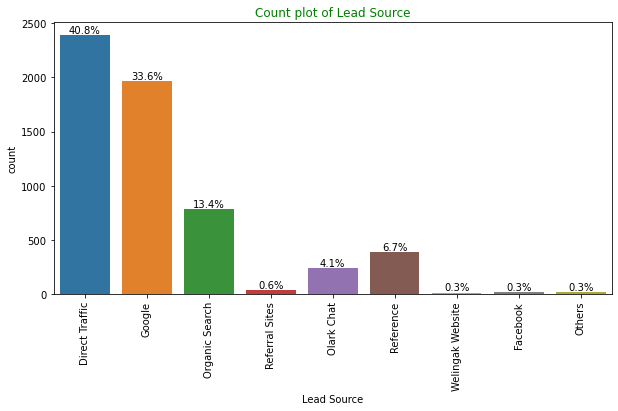

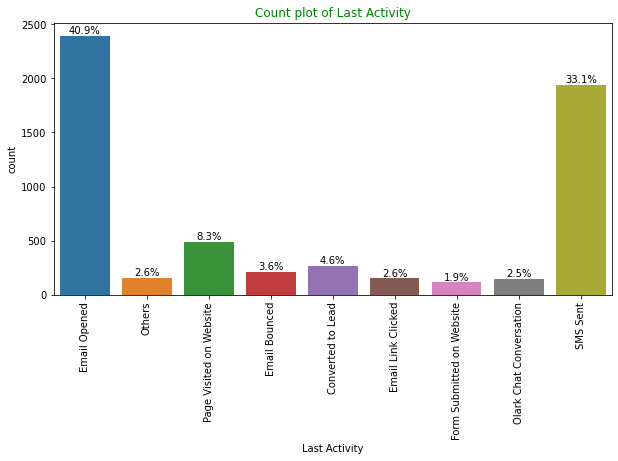

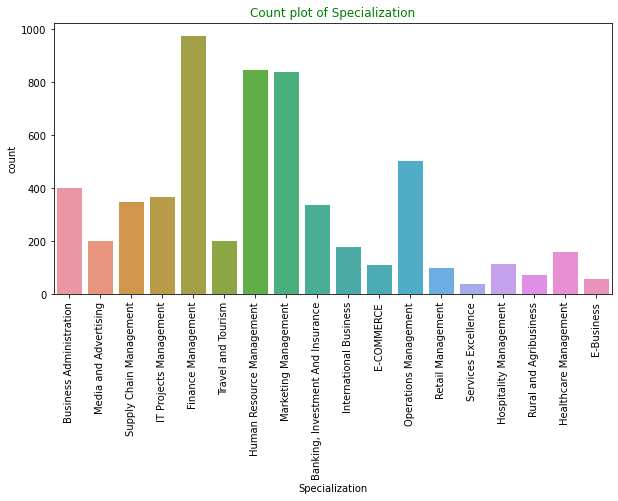

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
c_cols = ["Lead Origin", "Current_occupation", "Do Not Email", "Free_copy", "Lead Source", "Last Activity", "Specialization"]

# Create countplots with percentage annotations for the remaining categorical columns
for i in c_cols[4:]:
    plt.figure(figsize=[10, 5])
    plt.title("Count plot of {}".format(i), color="green")
    a = sns.countplot(x=i, data=df)
    total = len(df[i])
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    
    if i != "Specialization":  # Avoiding Specialization for messy xtick labels
        for p in a.patches:
            text = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            a.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


Observations:

During the process of Categorical Univariate Analysis, we gain insights into the distribution of values within each categorical variable. This analysis provides us with an understanding of how the values are distributed across different columns.

This understanding helps us identify which variables are suitable for further exploration in Bivariate analysis.

<strong><span style="color:purple">Observations:</span></strong> 

- Categorical Univariate Analysis allows us to understand the distribution of values in each column by calculating value count percentages.

- This analysis provides valuable insights into which variables are suitable for further exploration in **Bivariate analysis**.

**Univariate Insights:**

Here are key insights from the analysis of features, considering both converted and non-converted leads:

- **Lead Origin:** "Landing Page Submission" is the most common lead origin, accounting for 82% of customers, while "API" represents 11%.

- **Current Occupation:** Approximately 86% of customers are categorized as "Unemployed."

- **Do Not Email:** A significant majority, 91%, have indicated that they do not wish to receive emails about the course.

- **Lead Source:** The majority of leads, 75%, originate from sources such as Google and Direct Traffic when combined.

- **Last Activity:** Activities such as "SMS Sent" and "Email Opened" contribute to about 74% of customer interactions.

<strong><span style="color:blue">NOTE:</span></strong>
These insights will serve as a foundation for further exploration in Bivariate Analysis.

# Bivariate Analysis

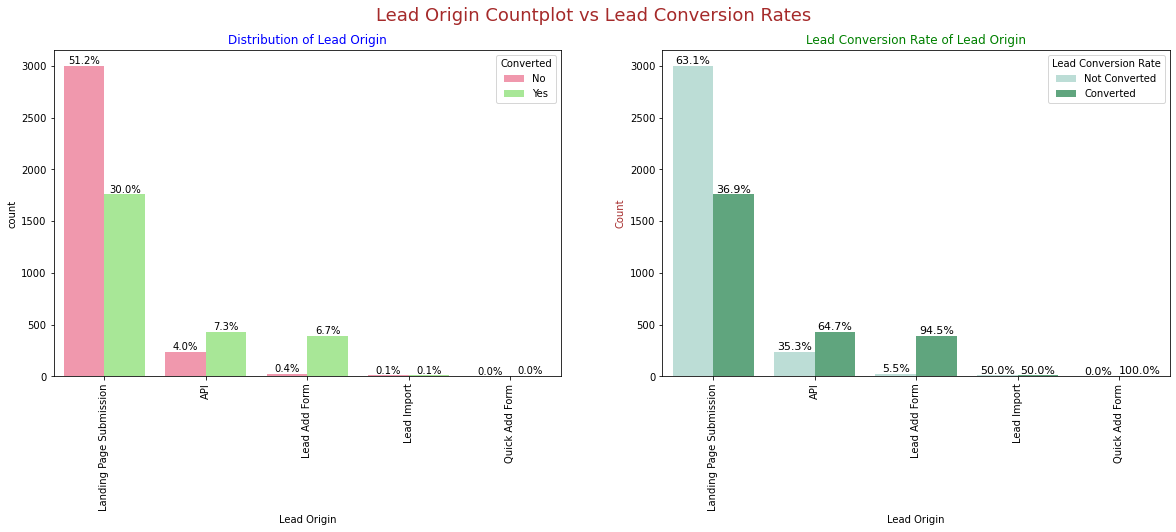

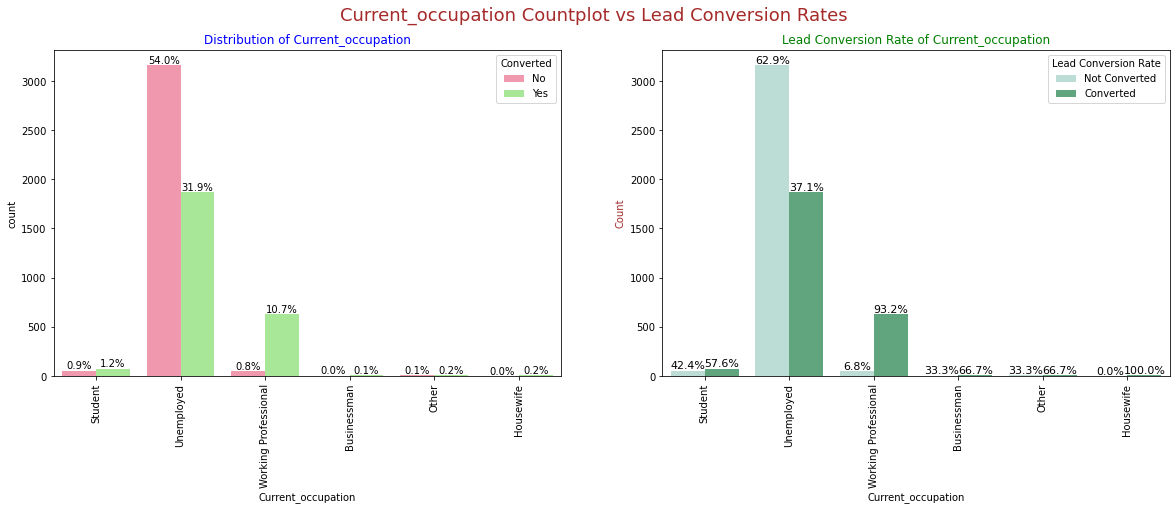

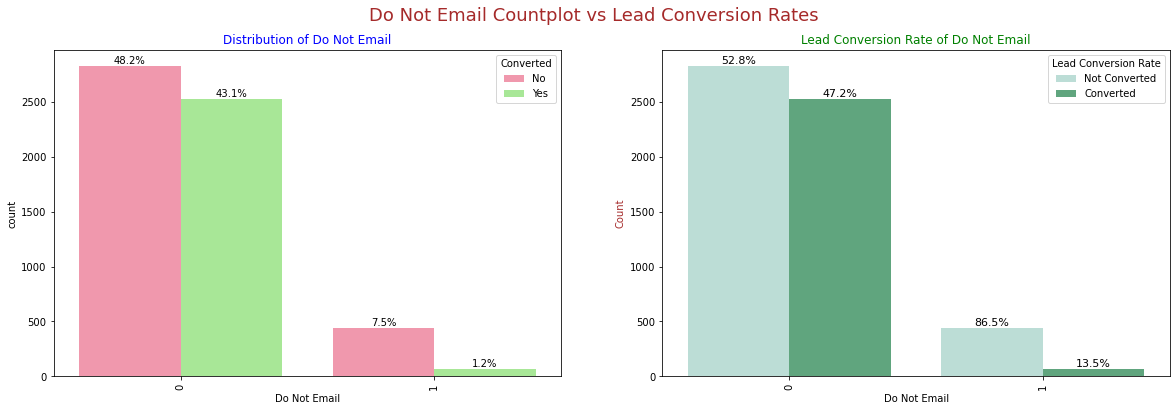

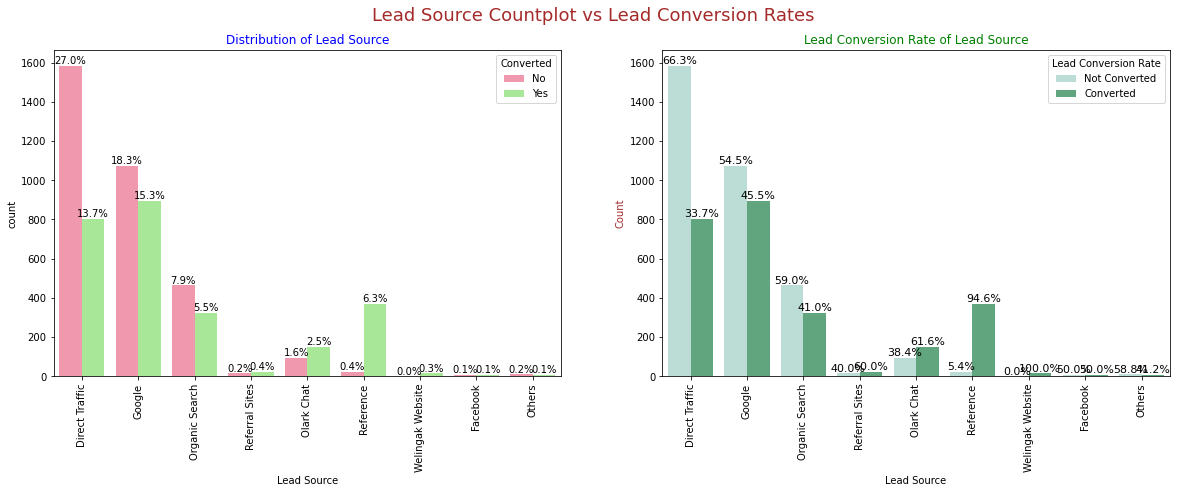

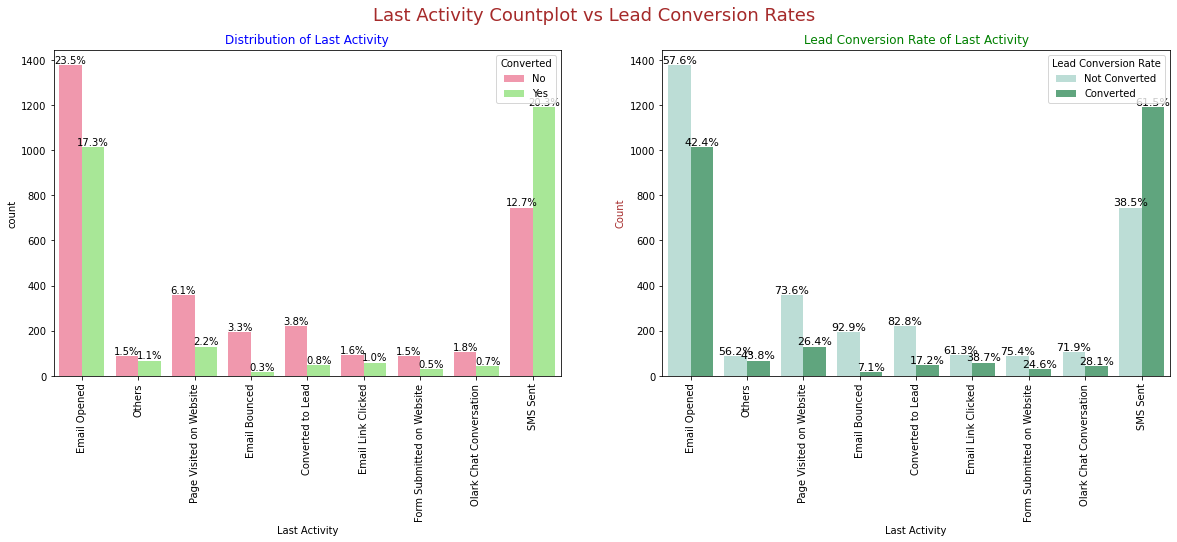

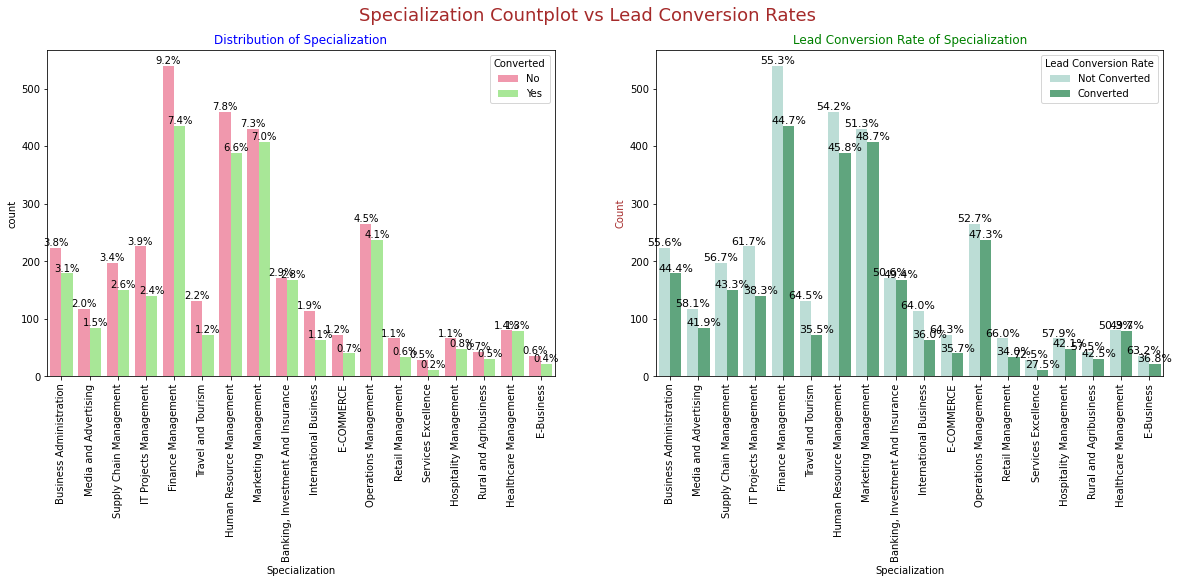

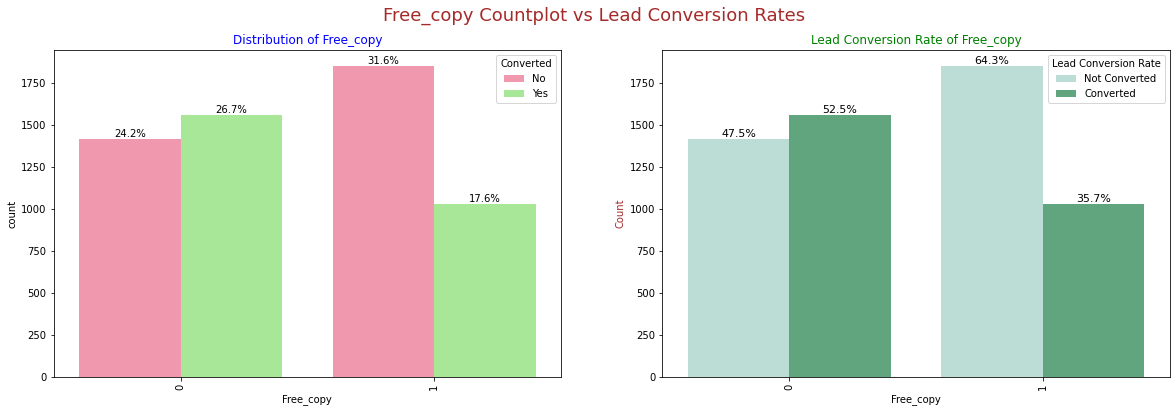

In [85]:
def Bivariate_cat(df, variable_name, Target="Converted"):
    plt.figure(figsize=(20, 6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name), color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1, 2, 1)
    plt.title("Distribution of {}".format(variable_name), color="blue")
    a = sns.countplot(x=variable_name, hue=Target, data=df, palette="prism_r", alpha=0.46)
    
    total = len(df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No", "Yes"], title="Converted")
    
    # Annotation for 1st plot        
    for p in a.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        a.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # 2nd plot
    plt.subplot(1, 2, 2)
    plt.title("Lead Conversion Rate of {}".format(variable_name), color="green", fontsize=12)
    a = sns.countplot(x=variable_name, hue=Target, data=df, palette="BuGn", alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count", color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted", "Converted"], title="Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in a.containers]
    for bars in a.containers:
        for i, p in enumerate(bars):
            total_height = sum(xgroup[i] for xgroup in all_heights)
            percentage = '{:.1f}%'.format((100 * p.get_height() / total_height))
            a.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

# List of categorical columns
c_cols = ["Lead Origin", "Current_occupation", "Do Not Email",
          "Lead Source", "Last Activity", "Specialization", "Free_copy"]

# Bivariate Analysis for all these variables using a loop and UDF
# Comparison between variables w.r.t. 'Converted' (Target variable), taking one categorical column w.r.t target variable as 'hue'
for i in c_cols:
    Bivariate_cat(df, variable_name=i)

Below provided are some of the insightful observations based on the bivariate analysis of various categorical variables with respect to lead conversion. Here's a summary of the key insights:

**Lead Origin:**
- Around 82% of all leads originated from "Landing Page Submission" with a lead conversion rate (LCR) of 36%.
- The "API" identified approximately 11% of customers with a significantly higher LCR of 64%.

**Current Occupation:**
- Around 86% of the customers are unemployed with a lead conversion rate (LCR) of 37%.
- Working Professionals, while contributing only 11% of total customers, have an impressive LCR of nearly 93%.

**Do Not Email:**
- 91% of people have opted not to be emailed about the course.

**Lead Source:**
- Google has an LCR of 45% out of 34% customers.
- Direct Traffic contributes 33% LCR with 41% of customers.
- Organic Search also has a relatively high LCR of 41%, but the contribution is by only 13.6% of customers.
- "Reference" has the highest LCR of 94%, but there are only around 6.7% of customers through this lead source.

**Last Activity:**
- 'SMS Sent' has the highest lead conversion rate of 61%, contributing 33% to the last activities performed by customers.
- 'Email Opened' activity contributed 40% of last activities performed by customers with a 41% lead conversion rate.

**Specialization:**
- "Marketing Management," "HR Management," and "Finance Management" show good contribution, but further analysis may be needed to understand their impact on lead conversion.

These insights provide valuable information for making informed decisions in lead conversion strategies.

# Bivariate Analysis for Numerical Variables

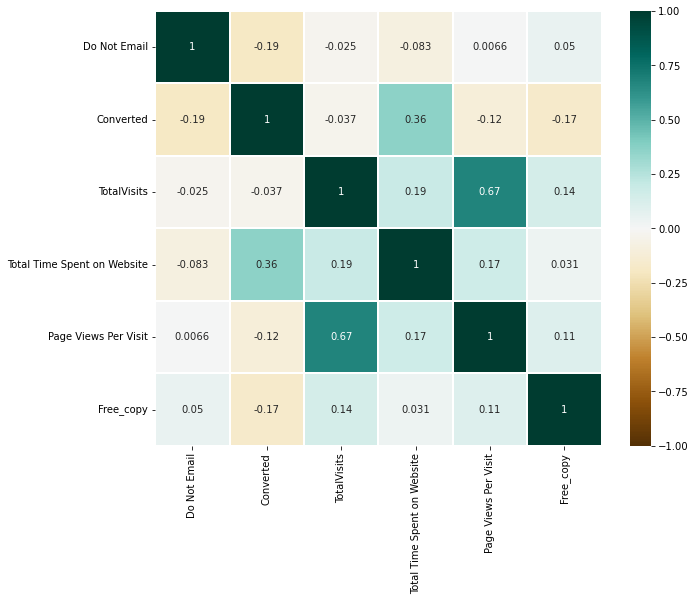

In [86]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

<Figure size 864x216 with 0 Axes>

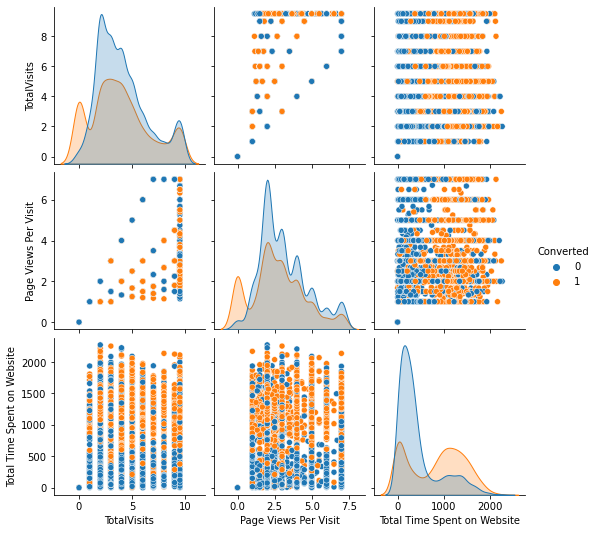

In [87]:
plt.figure(figsize=(12, 3))
sns.pairplot(data=df,vars=num_cols,hue="Converted")                                  
plt.show()

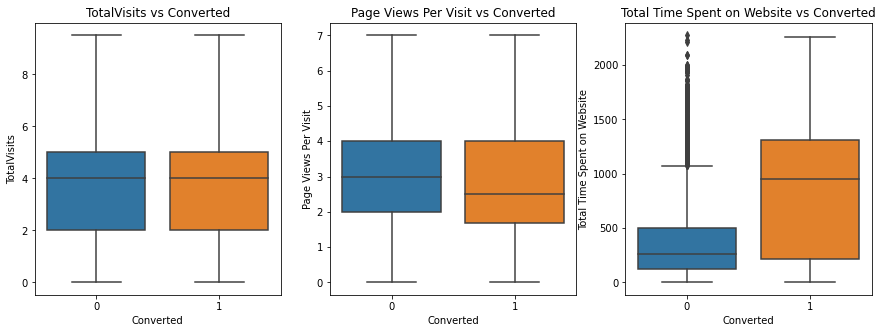

In [88]:
# List of numeric columns
num_cols = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

# Create subplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=col, x='Converted', data=df)
    plt.title(f'{col} vs Converted')

plt.show()


The boxplot for "Total Time Spent on Website" suggests that past leads who spend more time on the website tend to be more successfully converted compared to those who spend less time. This could indicate that spending more time on the website might be associated with higher engagement and interest in the products or services offered, which in turn leads to a higher conversion rate. This insight can be valuable for designing strategies to engage and convert leads effectively.

# Preparing for Data Modeling

Dummy Variable Creation

In [89]:
# Check the columns which are of type 'object'
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'Current_occupation'],
      dtype='object')

In [90]:
# Create dummy variables for categorical columns
categorical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                       'Current_occupation', 'Free_copy', 
                       'Last Activity']

dummy = pd.get_dummies(df[categorical_columns], drop_first=True)

# Add the dummy variables to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [91]:
# Creating dummy variables for 'Specialization' column
dummy_spl = pd.get_dummies(df['Specialization'], prefix='Specialization')
df = pd.concat([df, dummy_spl], axis=1)

In [92]:
# Drop the variables for which the dummy variables have been created
df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'Current_occupation', 'Free_copy'], axis=1)

In [93]:
df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Current_occupation_Housewife', 'Current_occupation_Other',
       'Current_occupation_Student', 'Current_occupation_Unemployed',
       'Current_occupation_Working Professional',
       'Last Activity_Email Bounced', 

In [94]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,2.0,71,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,4.0,58,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Test_Train Split

We need to partition the dataset into training and testing subsets.

In [95]:
# Put all the feature variables in X

X = df.drop(labels=['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,2.0,1640,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,2.0,71,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,4.0,58,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
# Put the target variable in y
y = df['Converted']
y.head()

2    1
3    0
6    1
8    0
9    0
Name: Converted, dtype: int64

In [97]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [98]:
y_test.shape

(1758,)

Now, we need to scale the numeric variables in the dataset as they have different scales.

In [99]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
6529,0.526316,0.290493,0.714286,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2509,0.315789,0.431338,0.428571,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4265,0.421053,0.025088,0.571429,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4872,0.210526,0.018046,0.285714,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3909,0.315789,0.562060,0.428571,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Now, let's examine the correlations between variables. Given the relatively large number of variables, it's more practical to analyze the correlation table rather than creating a heatmap.

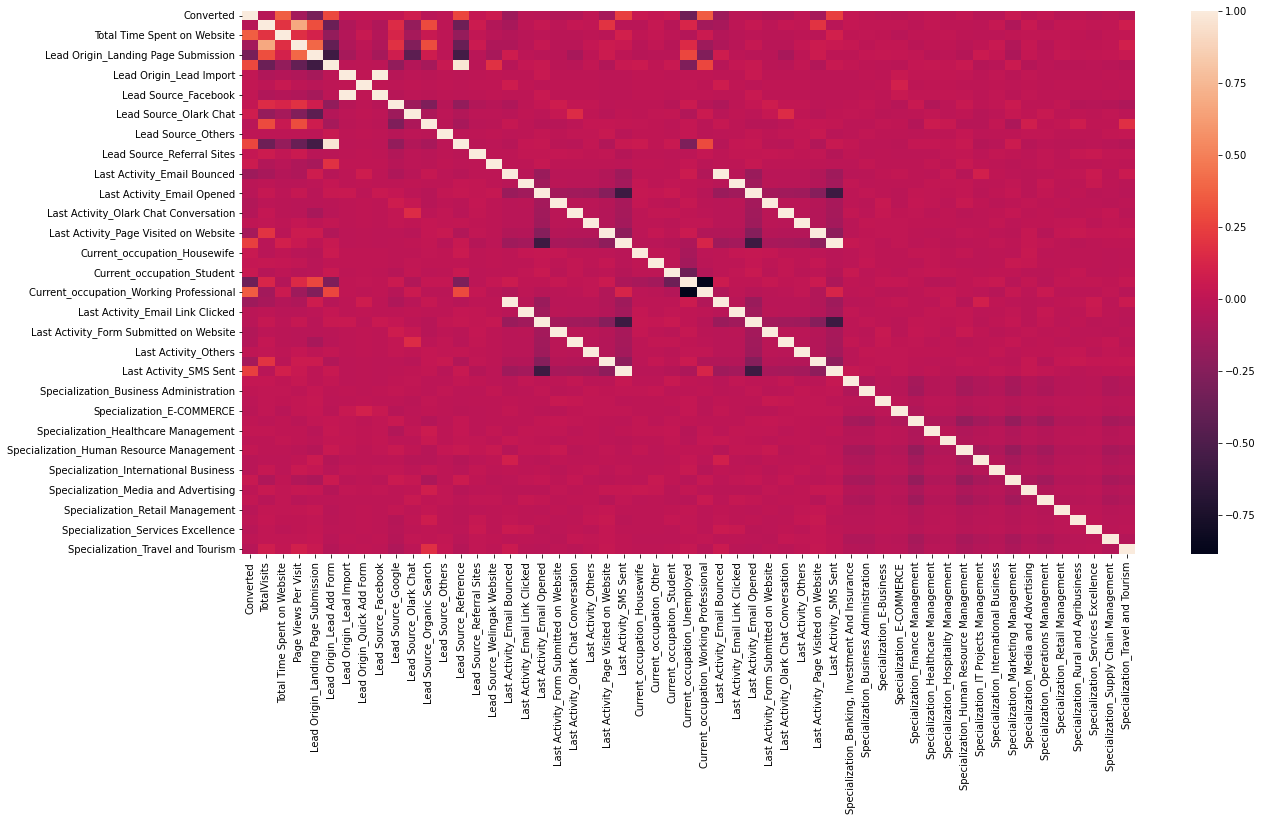

In [100]:
# Looking at the correlation table
plt.figure(figsize = (20,10))
sns.heatmap(df.corr())
plt.show()

# Model Building

Now, let's proceed with model building. As you can observe, there is a multitude of variables in the dataset, making it impractical to work with all of them simultaneously. To tackle this, we will employ Recursive Feature Elimination (RFE) to select a smaller, more meaningful set of features from this extensive pool of variables.

In [101]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression

# Create a LogisticRegression model with an increased max_iter
logreg = LogisticRegression(max_iter=1000)  # You can adjust the value as needed

# Initialize RFE with LogisticRegression and select 25 variables
rfe = RFE(logreg, n_features_to_select=25)

# Fit the RFE model to your data
rfe = rfe.fit(X_train, y_train)

In [102]:
# Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 16),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 8),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 24),
 ('Last Activity_SMS Sent', True, 1),
 ('Current_occupation_Housewife', 

In [103]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Current_occupation_Housewife',
       'Current_occupation_Other', 'Current_occupation_Unemployed',
       'Current_occupation_Working Professional',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'Specialization_Services Excellence'],
      dtype='object')

In [104]:
# Select only the columns selected by RFE
X_train_rfe = X_train[col]
X_train_rfe.shape

(4102, 34)

In [105]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Current_occupation_Student',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
    

In [106]:
# Check the top 15 features chosen by RFE
Rfe_Data = pd.DataFrame()
Rfe_Data['Feature']= X_train.columns
Rfe_Data['Feature Chosen'] = rfe.support_
Rfe_Data['Ranking'] = rfe.ranking_
Rfe_Data=Rfe_Data[Rfe_Data["Feature Chosen"]==True]
Rfe_Data

,Feature,Feature Chosen,Ranking
0,TotalVisits,True,1
1,Total Time Spent on Website,True,1
2,Page Views Per Visit,True,1
3,Lead Origin_Landing Page Submission,True,1
4,Lead Origin_Lead Add Form,True,1
7,Lead Source_Facebook,True,1
9,Lead Source_Olark Chat,True,1
12,Lead Source_Reference,True,1
13,Lead Source_Referral Sites,True,1
14,Lead Source_Welingak Website,True,1


In [107]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Current_occupation_Housewife',
       'Current_occupation_Other', 'Current_occupation_Unemployed',
       'Current_occupation_Working Professional',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'Specialization_Services Excellence'],
      dtype='object')

In [108]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Current_occupation_Student',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
    

In [109]:
# User-defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

# Model 1

In [110]:
# Columns selected by RFE to be used for this model 
rfe_cols = X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_cols]

# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_rfe)

# Create a fitted model
logit_model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

# Get the model parameters
model_params = logit_model.params

In [111]:
logit_model.params

const                                      -0.901911
TotalVisits                                 1.294543
Total Time Spent on Website                 4.377330
Page Views Per Visit                       -1.107620
Lead Origin_Landing Page Submission        -1.114265
Lead Origin_Lead Add Form                   2.493265
Lead Source_Facebook                        1.009442
Lead Source_Olark Chat                      0.674381
Lead Source_Reference                       0.371627
Lead Source_Referral Sites                  1.811975
Lead Source_Welingak Website               21.613088
Last Activity_Email Bounced                -0.333811
Last Activity_Email Bounced                -0.333811
Last Activity_Email Link Clicked            0.391916
Last Activity_Email Link Clicked            0.391916
Last Activity_Olark Chat Conversation      -0.388077
Last Activity_Olark Chat Conversation      -0.388077
Last Activity_Others                        0.251464
Last Activity_Others                        0.

In [112]:
#Let's see the summary of our logistic regression model
print(logit_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4079
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1804.9
Date:                Thu, 21 Sep 2023   Deviance:                       3609.9
Time:                        22:35:44   Pearson chi2:                 5.62e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Model 1 has significant p-values above the threshold (p > 0.05). We will proceed futher with model building for more analysis.

Next, we will assess the Variance Inflation Factors (VIFs) for these variables to identify potential multicollinearity among the independent variables.

In [113]:
# Now checking VIFs for all variables in the Model 1
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Activity_Email Bounced,inf
30,Last Activity_Email Opened,inf
28,Last Activity_Email Bounced,inf
31,Last Activity_Form Submitted on Website,inf
32,Last Activity_Olark Chat Conversation,inf
33,Last Activity_Others,inf
34,Last Activity_Page Visited on Website,inf
22,Last Activity_SMS Sent,inf
21,Last Activity_Page Visited on Website,inf
20,Last Activity_Others,inf


In [114]:
# Drop the specified features from X_train
X_train.drop(['Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Email Bounced', 
    'Last Activity_Form Submitted on Website', 'Last Activity_Olark Chat Conversation',
    'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
    'Lead Source_Facebook', 'Lead Origin_Lead Import','Last Activity_Email Link Clicked'], axis=1, inplace=True)

In [115]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,Specialization_Finance Management,174.81
25,Specialization_Human Resource Management,151.93
28,Specialization_Marketing Management,150.05
16,Current_occupation_Unemployed,126.23
17,Current_occupation_Working Professional,105.28
30,Specialization_Operations Management,93.74
19,Specialization_Business Administration,72.49
26,Specialization_IT Projects Management,70.28
18,"Specialization_Banking, Investment And Insurance",64.07
34,Specialization_Supply Chain Management,63.69


In [116]:
# Drop the specified features from X_train
X_train.drop(['Specialization_Finance Management'], axis=1, inplace=True)

In [117]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,41.90
10,Lead Source_Reference,39.47
16,Current_occupation_Unemployed,23.16
3,Lead Origin_Landing Page Submission,12.63
2,Page Views Per Visit,8.17
0,TotalVisits,6.69
17,Current_occupation_Working Professional,3.96
12,Lead Source_Welingak Website,2.58
1,Total Time Spent on Website,2.39
6,Lead Source_Google,2.04


The few VIFs are above 5.

# Model 2 

In [118]:
# Refit the model with the new set of features

logit_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logit_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4067
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1939.2
Date:                Thu, 21 Sep 2023   Deviance:                       3878.4
Time:                        22:35:48   Pearson chi2:                 5.75e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3469
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               21.6021   3.35e+04      0.001      0.999   -6.56e+04    6.57e+04
TotalVisits                                          0.9628      0.197      4.884      0.000       0.576       1.349
Total Time Spent on Website                          4.3727      0.179     24.445      0.000       4.022       4.723
Page Views Per Visit                                -0.5720      0.226     -2.530      0.011      -1.015      -0.129
Lead Origin_Landing Page Submission                 -0.8759      0.155     -5.649      0.000      -1.180      -0.572
Lead Origin_Lead Add Form                            3.1296      1.118      2.800      0.005       0.939       5.320
Lead Origin_Quick Add Form                        2.914e-10   8.93e-07      0.000      1.000   -1.75e-06    1.75e-06
Lead Source_Google                                   0.3480      0.095      3.670      0.000       0.162       0.534
Lead Source_Olark Chat                               0.9820      0.255      3.846      0.000       0.482       1.483
Lead Source_Organic Search                           0.0854      0.136      0.627      0.531      -0.182       0.353
Lead Source_Others                                  -0.3365      0.794     -0.424      0.672      -1.893       1.220
Lead Source_Reference                                0.2292      1.134      0.202      0.840      -1.993       2.451
Lead Source_Referral Sites                           1.4530      0.576      2.524      0.012       0.325       2.581
Lead Source_Welingak Website                        21.4739   2.08e+04      0.001      0.999   -4.07e+04    4.08e+04
Current_occupation_Housewife                         0.4810   4.01e+04    1.2e-05      1.000   -7.86e+04    7.86e+04
Current_occupation_Other                           -23.0554   3.35e+04     -0.001      0.999   -6.57e+04    6.56e+04
Current_occupation_Student                         -22.2729   3.35e+04     -0.001      0.999   -6.57e+04    6.56e+04
Current_occupation_Unemployed                      -23.1380   3.35e+04     -0.001      0.999   -6.57e+04    6.56e+04
Current_occupation_Working Professional            -20.3222   3.35e+04     -0.001      1.000   -6.57e+04    6.56e+04
Specialization_Banking, Investment And Insurance     0.2353      0.187      1.255      0.209      -0.132       0.603
Specialization_Business Administration              -0.0123      0.182     -0.067      0.946      -0.370       0.345
Specialization_E-Business                           -0.1166      0.405     -0.288      0.773      -0.910       0.677
Specialization_E-COMMERCE                           -0.1505      0.329     -0.457      0.648      -0.796       0.495
Specialization_Healthcare Management     

Dropping the 'Current_occupation_Housewife' as having high P value

In [119]:
X_train.drop('Current_occupation_Housewife', axis = 1, inplace = True)

# Model 3

In [120]:
# Refit the model with the new set of features

logit_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logit_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4068
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1939.2
Date:                Thu, 21 Sep 2023   Deviance:                       3878.4
Time:                        22:35:49   Pearson chi2:                 5.75e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3469
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               21.9572   1.84e+04      0.001      0.999    -3.6e+04    3.61e+04
TotalVisits                                          0.9628      0.197      4.884      0.000       0.576       1.349
Total Time Spent on Website                          4.3727      0.179     24.445      0.000       4.022       4.723
Page Views Per Visit                                -0.5720      0.226     -2.530      0.011      -1.015      -0.129
Lead Origin_Landing Page Submission                 -0.8759      0.155     -5.649      0.000      -1.180      -0.572
Lead Origin_Lead Add Form                            3.1296      1.118      2.800      0.005       0.939       5.320
Lead Origin_Quick Add Form                       -1.443e-10    1.4e-07     -0.001      0.999   -2.74e-07    2.74e-07
Lead Source_Google                                   0.3480      0.095      3.670      0.000       0.162       0.534
Lead Source_Olark Chat                               0.9820      0.255      3.846      0.000       0.482       1.483
Lead Source_Organic Search                           0.0854      0.136      0.627      0.531      -0.182       0.353
Lead Source_Others                                  -0.3365      0.794     -0.424      0.672      -1.893       1.220
Lead Source_Reference                                0.2292      1.134      0.202      0.840      -1.993       2.451
Lead Source_Referral Sites                           1.4530      0.576      2.524      0.012       0.325       2.581
Lead Source_Welingak Website                        21.4740   2.08e+04      0.001      0.999   -4.07e+04    4.08e+04
Current_occupation_Other                           -23.4104   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Current_occupation_Student                         -22.6280   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Current_occupation_Unemployed                      -23.4931   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Current_occupation_Working Professional            -20.6772   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Specialization_Banking, Investment And Insurance     0.2353      0.187      1.255      0.209      -0.132       0.603
Specialization_Business Administration              -0.0123      0.182     -0.067      0.946      -0.370       0.345
Specialization_E-Business                           -0.1166      0.405     -0.288      0.773      -0.910       0.677
Specialization_E-COMMERCE                           -0.1505      0.329     -0.457      0.648      -0.796       0.495
Specialization_Healthcare Management                 0.0882      0.259      0.341      0.733      -0.419       0.595
Specialization_Hospitality Management    

Dropping the 'Lead Origin_Quick Add Form' as having high P value

In [121]:
X_train.drop('Lead Origin_Quick Add Form', axis = 1, inplace = True)

# Model 4


In [122]:
# Refit the model with the new set of features

logit_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logit_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4068
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1939.2
Date:                Thu, 21 Sep 2023   Deviance:                       3878.4
Time:                        22:35:49   Pearson chi2:                 5.75e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3469
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               21.9572   1.84e+04      0.001      0.999    -3.6e+04    3.61e+04
TotalVisits                                          0.9628      0.197      4.884      0.000       0.576       1.349
Total Time Spent on Website                          4.3727      0.179     24.445      0.000       4.022       4.723
Page Views Per Visit                                -0.5720      0.226     -2.530      0.011      -1.015      -0.129
Lead Origin_Landing Page Submission                 -0.8759      0.155     -5.649      0.000      -1.180      -0.572
Lead Origin_Lead Add Form                            3.1296      1.118      2.800      0.005       0.939       5.320
Lead Source_Google                                   0.3480      0.095      3.670      0.000       0.162       0.534
Lead Source_Olark Chat                               0.9820      0.255      3.846      0.000       0.482       1.483
Lead Source_Organic Search                           0.0854      0.136      0.627      0.531      -0.182       0.353
Lead Source_Others                                  -0.3365      0.794     -0.424      0.672      -1.893       1.220
Lead Source_Reference                                0.2292      1.134      0.202      0.840      -1.993       2.451
Lead Source_Referral Sites                           1.4530      0.576      2.524      0.012       0.325       2.581
Lead Source_Welingak Website                        21.4740   2.08e+04      0.001      0.999   -4.07e+04    4.08e+04
Current_occupation_Other                           -23.4104   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Current_occupation_Student                         -22.6280   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Current_occupation_Unemployed                      -23.4931   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Current_occupation_Working Professional            -20.6772   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Specialization_Banking, Investment And Insurance     0.2353      0.187      1.255      0.209      -0.132       0.603
Specialization_Business Administration              -0.0123      0.182     -0.067      0.946      -0.370       0.345
Specialization_E-Business                           -0.1166      0.405     -0.288      0.773      -0.910       0.677
Specialization_E-COMMERCE                           -0.1505      0.329     -0.457      0.648      -0.796       0.495
Specialization_Healthcare Management                 0.0882      0.259      0.341      0.733      -0.419       0.595
Specialization_Hospitality Management               -0.6014      0.324     -1.859      0.063      -1.236       0.033
Specialization_Human Resource Management 

Dropping the 'Lead Source_Welingak Website' as having high P value

In [123]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

# Model 5

In [124]:
# Refit the model with the new set of features

logit_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logit_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4069
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1940.2
Date:                Thu, 21 Sep 2023   Deviance:                       3880.3
Time:                        22:35:49   Pearson chi2:                 5.78e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3466
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               21.9570   1.84e+04      0.001      0.999    -3.6e+04    3.61e+04
TotalVisits                                          0.9629      0.197      4.885      0.000       0.577       1.349
Total Time Spent on Website                          4.3724      0.179     24.446      0.000       4.022       4.723
Page Views Per Visit                                -0.5715      0.226     -2.527      0.011      -1.015      -0.128
Lead Origin_Landing Page Submission                 -0.8777      0.155     -5.658      0.000      -1.182      -0.574
Lead Origin_Lead Add Form                            4.1652      1.054      3.953      0.000       2.100       6.230
Lead Source_Google                                   0.3462      0.095      3.651      0.000       0.160       0.532
Lead Source_Olark Chat                               0.9780      0.256      3.826      0.000       0.477       1.479
Lead Source_Organic Search                           0.0839      0.136      0.616      0.538      -0.183       0.351
Lead Source_Others                                  -0.4314      0.823     -0.524      0.600      -2.045       1.182
Lead Source_Reference                               -0.8091      1.068     -0.758      0.449      -2.902       1.284
Lead Source_Referral Sites                           1.4510      0.576      2.520      0.012       0.323       2.579
Current_occupation_Other                           -23.4103   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Current_occupation_Student                         -22.6297   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Current_occupation_Unemployed                      -23.4918   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Current_occupation_Working Professional            -20.6760   1.84e+04     -0.001      0.999   -3.61e+04     3.6e+04
Specialization_Banking, Investment And Insurance     0.2367      0.187      1.263      0.207      -0.131       0.604
Specialization_Business Administration              -0.0070      0.182     -0.038      0.969      -0.364       0.350
Specialization_E-Business                           -0.1155      0.405     -0.285      0.775      -0.909       0.678
Specialization_E-COMMERCE                           -0.1494      0.329     -0.454      0.650      -0.795       0.496
Specialization_Healthcare Management                 0.0877      0.259      0.339      0.734      -0.419       0.595
Specialization_Hospitality Management               -0.5999      0.324     -1.854      0.064      -1.234       0.034
Specialization_Human Resource Management            -0.0712      0.144     -0.494      0.622      -0.354       0.212
Specialization_IT Projects Management    

Dropping the 'Current_occupation_Other' as having high P value

In [125]:
X_train.drop('Current_occupation_Other', axis = 1, inplace = True)

# Model 6 

In [126]:
# Refit the model with the new set of features

logit_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logit_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4070
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1944.9
Date:                Thu, 21 Sep 2023   Deviance:                       3889.7
Time:                        22:35:49   Pearson chi2:                 5.81e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3451
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.3309      0.599     -0.552      0.581      -1.505       0.843
TotalVisits                                          0.9397      0.197      4.774      0.000       0.554       1.326
Total Time Spent on Website                          4.3591      0.178     24.428      0.000       4.009       4.709
Page Views Per Visit                                -0.5699      0.226     -2.524      0.012      -1.012      -0.127
Lead Origin_Landing Page Submission                 -0.8759      0.155     -5.656      0.000      -1.179      -0.572
Lead Origin_Lead Add Form                            4.1548      1.053      3.944      0.000       2.090       6.220
Lead Source_Google                                   0.3536      0.095      3.734      0.000       0.168       0.539
Lead Source_Olark Chat                               0.9658      0.255      3.781      0.000       0.465       1.466
Lead Source_Organic Search                           0.1065      0.136      0.784      0.433      -0.160       0.373
Lead Source_Others                                  -0.4240      0.823     -0.515      0.606      -2.037       1.189
Lead Source_Reference                               -0.7940      1.068     -0.744      0.457      -2.887       1.299
Lead Source_Referral Sites                           1.4585      0.575      2.536      0.011       0.331       2.586
Current_occupation_Student                          -0.3359      0.620     -0.542      0.588      -1.551       0.879
Current_occupation_Unemployed                       -1.1974      0.567     -2.110      0.035      -2.310      -0.085
Current_occupation_Working Professional              1.6167      0.598      2.704      0.007       0.445       2.789
Specialization_Banking, Investment And Insurance     0.2383      0.187      1.272      0.203      -0.129       0.605
Specialization_Business Administration              -0.0103      0.182     -0.057      0.955      -0.367       0.346
Specialization_E-Business                           -0.1150      0.404     -0.284      0.776      -0.908       0.678
Specialization_E-COMMERCE                           -0.1394      0.327     -0.426      0.670      -0.781       0.502
Specialization_Healthcare Management                 0.0941      0.257      0.366      0.714      -0.410       0.598
Specialization_Hospitality Management               -0.6021      0.324     -1.861      0.063      -1.236       0.032
Specialization_Human Resource Management            -0.0618      0.144     -0.429      0.668      -0.344       0.221
Specialization_IT Projects Management                0.0988      0.182      0.543      0.587      -0.258       0.455
Specialization_International Business    

Dropping the 'Specialization_Supply Chain Management' as having high P value

In [127]:
X_train.drop('Specialization_Supply Chain Management', axis = 1, inplace = True)

# Model 6


In [128]:
# Refit the model with the new set of features

logit_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logit_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4071
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1944.9
Date:                Thu, 21 Sep 2023   Deviance:                       3889.7
Time:                        22:35:50   Pearson chi2:                 5.81e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3451
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.3303      0.597     -0.553      0.580      -1.501       0.840
TotalVisits                                          0.9397      0.197      4.774      0.000       0.554       1.326
Total Time Spent on Website                          4.3590      0.178     24.428      0.000       4.009       4.709
Page Views Per Visit                                -0.5699      0.226     -2.524      0.012      -1.012      -0.127
Lead Origin_Landing Page Submission                 -0.8759      0.155     -5.656      0.000      -1.179      -0.572
Lead Origin_Lead Add Form                            4.1547      1.053      3.944      0.000       2.090       6.219
Lead Source_Google                                   0.3535      0.095      3.740      0.000       0.168       0.539
Lead Source_Olark Chat                               0.9658      0.255      3.781      0.000       0.465       1.466
Lead Source_Organic Search                           0.1065      0.136      0.784      0.433      -0.160       0.373
Lead Source_Others                                  -0.4236      0.822     -0.515      0.606      -2.035       1.188
Lead Source_Reference                               -0.7940      1.068     -0.744      0.457      -2.887       1.299
Lead Source_Referral Sites                           1.4584      0.575      2.536      0.011       0.331       2.586
Current_occupation_Student                          -0.3359      0.620     -0.542      0.588      -1.551       0.879
Current_occupation_Unemployed                       -1.1973      0.567     -2.110      0.035      -2.309      -0.085
Current_occupation_Working Professional              1.6168      0.598      2.704      0.007       0.445       2.789
Specialization_Banking, Investment And Insurance     0.2376      0.180      1.318      0.187      -0.116       0.591
Specialization_Business Administration              -0.0110      0.175     -0.063      0.950      -0.354       0.332
Specialization_E-Business                           -0.1157      0.401     -0.288      0.773      -0.902       0.671
Specialization_E-COMMERCE                           -0.1400      0.323     -0.433      0.665      -0.773       0.493
Specialization_Healthcare Management                 0.0935      0.252      0.371      0.711      -0.400       0.587
Specialization_Hospitality Management               -0.6027      0.320     -1.886      0.059      -1.229       0.024
Specialization_Human Resource Management            -0.0624      0.135     -0.462      0.644      -0.327       0.202
Specialization_IT Projects Management                0.0982      0.175      0.562      0.574      -0.244       0.440
Specialization_International Business    

Dropping the 'Specialization_Travel and Tourism' as having high P value

In [129]:
X_train.drop('Specialization_Travel and Tourism', axis = 1, inplace = True)

# Model 7

In [130]:
# Refit the model with the new set of features

logit_model = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logit_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4072
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1944.9
Date:                Thu, 21 Sep 2023   Deviance:                       3889.7
Time:                        22:35:50   Pearson chi2:                 5.81e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3451
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.3314      0.597     -0.555      0.579      -1.501       0.838
TotalVisits                                          0.9397      0.197      4.774      0.000       0.554       1.326
Total Time Spent on Website                          4.3589      0.178     24.432      0.000       4.009       4.709
Page Views Per Visit                                -0.5703      0.226     -2.527      0.012      -1.013      -0.128
Lead Origin_Landing Page Submission                 -0.8759      0.155     -5.655      0.000      -1.179      -0.572
Lead Origin_Lead Add Form                            4.1551      1.053      3.944      0.000       2.090       6.220
Lead Source_Google                                   0.3537      0.094      3.745      0.000       0.169       0.539
Lead Source_Olark Chat                               0.9657      0.255      3.780      0.000       0.465       1.466
Lead Source_Organic Search                           0.1055      0.134      0.785      0.432      -0.158       0.369
Lead Source_Others                                  -0.4249      0.822     -0.517      0.605      -2.036       1.186
Lead Source_Reference                               -0.7943      1.068     -0.744      0.457      -2.887       1.298
Lead Source_Referral Sites                           1.4578      0.575      2.536      0.011       0.331       2.585
Current_occupation_Student                          -0.3364      0.620     -0.543      0.587      -1.551       0.878
Current_occupation_Unemployed                       -1.1977      0.567     -2.111      0.035      -2.310      -0.086
Current_occupation_Working Professional              1.6167      0.598      2.704      0.007       0.445       2.788
Specialization_Banking, Investment And Insurance     0.2393      0.177      1.349      0.177      -0.108       0.587
Specialization_Business Administration              -0.0093      0.172     -0.054      0.957      -0.346       0.328
Specialization_E-Business                           -0.1140      0.400     -0.285      0.776      -0.898       0.670
Specialization_E-COMMERCE                           -0.1383      0.321     -0.430      0.667      -0.768       0.492
Specialization_Healthcare Management                 0.0952      0.250      0.382      0.703      -0.394       0.584
Specialization_Hospitality Management               -0.6011      0.318     -1.890      0.059      -1.224       0.022
Specialization_Human Resource Management            -0.0608      0.131     -0.463      0.643      -0.318       0.197
Specialization_IT Projects Management                0.0998      0.172      0.580      0.562      -0.237       0.437
Specialization_International Business    

Dropping the 'Lead Source_Others' as having high P value

In [131]:
X_train.drop('Lead Source_Others', axis = 1, inplace = True)

# Model 8

In [132]:
# Refit the model with the new set of features

# Adding a constant variable 
X_train_sm = sm.add_constant(X_train)

# Create a fitted model

logit_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logit_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4102
Model:                            GLM   Df Residuals:                     4073
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1945.0
Date:                Thu, 21 Sep 2023   Deviance:                       3890.0
Time:                        22:35:50   Pearson chi2:                 5.81e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3450
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.3343      0.597     -0.560      0.575      -1.504       0.835
TotalVisits                                          0.9379      0.197      4.765      0.000       0.552       1.324
Total Time Spent on Website                          4.3592      0.178     24.434      0.000       4.010       4.709
Page Views Per Visit                                -0.5717      0.226     -2.533      0.011      -1.014      -0.129
Lead Origin_Landing Page Submission                 -0.8733      0.155     -5.642      0.000      -1.177      -0.570
Lead Origin_Lead Add Form                            4.1218      1.050      3.925      0.000       2.064       6.180
Lead Source_Google                                   0.3569      0.094      3.786      0.000       0.172       0.542
Lead Source_Olark Chat                               0.9699      0.255      3.799      0.000       0.469       1.470
Lead Source_Organic Search                           0.1090      0.134      0.812      0.417      -0.154       0.372
Lead Source_Reference                               -0.7571      1.064     -0.712      0.477      -2.842       1.328
Lead Source_Referral Sites                           1.4617      0.575      2.543      0.011       0.335       2.588
Current_occupation_Student                          -0.3369      0.620     -0.544      0.587      -1.552       0.878
Current_occupation_Unemployed                       -1.1995      0.567     -2.114      0.034      -2.312      -0.088
Current_occupation_Working Professional              1.6158      0.598      2.703      0.007       0.444       2.788
Specialization_Banking, Investment And Insurance     0.2413      0.177      1.360      0.174      -0.106       0.589
Specialization_Business Administration              -0.0108      0.172     -0.063      0.950      -0.348       0.326
Specialization_E-Business                           -0.1119      0.400     -0.280      0.780      -0.896       0.672
Specialization_E-COMMERCE                           -0.1360      0.321     -0.423      0.672      -0.766       0.494
Specialization_Healthcare Management                 0.0973      0.250      0.390      0.697      -0.392       0.586
Specialization_Hospitality Management               -0.5997      0.318     -1.886      0.059      -1.223       0.023
Specialization_Human Resource Management            -0.0607      0.131     -0.462      0.644      -0.318       0.197
Specialization_IT Projects Management                0.1018      0.172      0.592      0.554      -0.235       0.439
Specialization_International Business               -0.3263      0.247     -1.319      0.187      -0.811       0.159
Specialization_Marketing Management      

In [133]:
X_train_sm.info()
rfe_col = X_train_sm.columns
print(rfe_col)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4102 entries, 6529 to 8910
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   const                                             4102 non-null   float64
 1   TotalVisits                                       4102 non-null   float64
 2   Total Time Spent on Website                       4102 non-null   float64
 3   Page Views Per Visit                              4102 non-null   float64
 4   Lead Origin_Landing Page Submission               4102 non-null   uint8  
 5   Lead Origin_Lead Add Form                         4102 non-null   uint8  
 6   Lead Source_Google                                4102 non-null   uint8  
 7   Lead Source_Olark Chat                            4102 non-null   uint8  
 8   Lead Source_Organic Search                        4102 non-null   uint8  
 9   Lead Source_Refe

In [134]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,187.22
12,Current_occupation_Unemployed,20.38
13,Current_occupation_Working Professional,17.58
5,Lead Origin_Lead Add Form,15.66
9,Lead Source_Reference,14.68
11,Current_occupation_Student,4.52
4,Lead Origin_Landing Page Submission,2.45
3,Page Views Per Visit,2.18
1,TotalVisits,1.99
7,Lead Source_Olark Chat,1.68


# Model Evaluation

Lets proceed to make predictions using this refined set of features.

In [135]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]
#y_train_pred

6529    0.877195
2509    0.621520
4265    0.161572
4872    0.090703
3909    0.508368
6228    0.204215
7298    0.239151
1022    0.690015
7398    0.198700
9076    0.984220
dtype: float64

In [136]:
# Extracting the first 10 predicted probabilities
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.8771946 , 0.62151987, 0.16157177, 0.09070336, 0.50836796,
       0.20421496, 0.23915062, 0.69001481, 0.19870009, 0.98422009])

Now, we need to determine the optimal cutoff threshold value for the probability. Let's begin by starting with the default value of 0.4 and add a new feature called "Predicted" to the DataFrame using these probabilities.

In [137]:
# checking head
y_train_pred_final = pd.DataFrame({'Actual_Converted':y_train.values, 'Predicted_Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Actual_Converted,Predicted_Converted_Prob
0,1,0.877195
1,1,0.621520
2,0,0.161572
3,1,0.090703
4,1,0.508368


In [138]:
y_train_pred_final['Predicted'] = y_train_pred_final["Predicted_Converted_Prob"].map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Actual_Converted,Predicted_Converted_Prob,Predicted
0,1,0.877195,1
1,1,0.621520,1
2,0,0.161572,0
3,1,0.090703,0
4,1,0.508368,1


# Confusion Matrix

In [139]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final["Actual_Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[1826  474]
 [ 393 1409]]


In [195]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       1826       |   474
# converted           393        |   1409  


# Above is the confusion matrix when we use threshold of probability as 0.4

Accuracy

In [141]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Actual_Converted"], y_train_pred_final["Predicted"]))

0.788639687957094


 sensitivity and specificity are essential metrics to assess a classification model's performance, going beyond mere accuracy.

In [142]:
true_positives = confusion[1, 1]
false_negatives = confusion[1, 0]
true_negatives = confusion[0, 0]
false_positives = confusion[0, 1]

sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.7819089900110988
Specificity: 0.7939130434782609


In [143]:
# Calculate false postive rate
print(false_positives/ float(true_negatives+false_positives))

0.20608695652173914


In [144]:
# positive predictive value 
print (true_positives / float(true_positives+false_positives))

0.7482740308019118


In [145]:
# Negative predictive value
print (true_negatives / float(true_negatives+ false_negatives))

0.8228931951329428


# ROC Curve

In [146]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Actual_Converted"], y_train_pred_final["Predicted_Converted_Prob"], drop_intermediate = False )

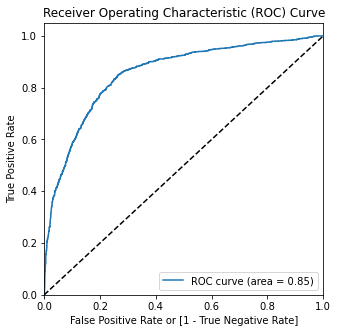

In [148]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Actual_Converted"], y_train_pred_final["Predicted_Converted_Prob"])

An area under the ROC curve of 0.85 is indeed indicative of a good predictive model. The ROC curve measures the model's ability to distinguish between positive and negative cases, and an ROC of 0.85 suggests that the model is performing well in this regard. Generally, a curve above 0.7 is considered good, and an ROC of 0.85 is a strong indication of the model's predictive power.

In [149]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Predicted_Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Converted,Predicted_Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.877195,1,1,1,1,1,1,1,1,1,1,0
1,1,0.621520,1,1,1,1,1,1,1,1,0,0,0
2,0,0.161572,0,1,1,0,0,0,0,0,0,0,0
3,1,0.090703,0,1,0,0,0,0,0,0,0,0,0
4,1,0.508368,1,1,1,1,1,1,1,0,0,0,0


In [150]:
print(y_train_pred_final.head())

   Actual_Converted  Predicted_Converted_Prob  Predicted  0.0  0.1  0.2  0.3  \
0                 1                  0.877195          1    1    1    1    1   
1                 1                  0.621520          1    1    1    1    1   
2                 0                  0.161572          0    1    1    0    0   
3                 1                  0.090703          0    1    0    0    0   
4                 1                  0.508368          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1    0  
1    1    1    1    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    1    1    0    0    0    0  


In [151]:
# Let's create columns with different probability cutoffs 
def calculate_metrics_for_cutoff(cutoff):
    y_train_pred_final[cutoff] = y_train_pred_final['Predicted_Converted_Prob'].apply(lambda x: 1 if x > cutoff else 0)
    confusion = metrics.confusion_matrix(y_train_pred_final["Actual_Converted"], y_train_pred_final[cutoff])
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TP = confusion[1, 1]
    
    sensitivity = TP / float(TP + FN)
    specificity = TN / float(TN + FP)
    accuracy = (TN + TP) / float(TN + FP + FN + TP)
    
    return sensitivity, specificity, accuracy

cutoffs = [float(x) / 10 for x in range(10)]
metrics_list = []

for cutoff in cutoffs:
    sensitivity, specificity, accuracy = calculate_metrics_for_cutoff(cutoff)
    metrics_list.append({'Cutoff': cutoff, 'Sensitivity': sensitivity, 'Specificity': specificity, 'Accuracy': accuracy})

metrics_df = pd.DataFrame(metrics_list)
metrics_df

,Cutoff,Sensitivity,Specificity,Accuracy
0,0.0,1.000000,0.000000,0.439298
1,0.1,0.989456,0.076957,0.477816
2,0.2,0.915649,0.554348,0.713067
3,0.3,0.862375,0.717826,0.781326
4,0.4,0.781909,0.793913,0.788640
5,0.5,0.703108,0.841739,0.780839
6,0.6,0.594895,0.893478,0.762311
7,0.7,0.481687,0.930870,0.733545
8,0.8,0.382908,0.966087,0.709898
9,0.9,0.240289,0.983913,0.657240


In [152]:
y_train_pred_final.head()

,Actual_Converted,Predicted_Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.877195,1,1,1,1,1,1,1,1,1,1,0
1,1,0.621520,1,1,1,1,1,1,1,1,0,0,0
2,0,0.161572,0,1,1,0,0,0,0,0,0,0,0
3,1,0.090703,0,1,0,0,0,0,0,0,0,0,0
4,1,0.508368,1,1,1,1,1,1,1,0,0,0,0


In [153]:
# Create an empty DataFrame to store cutoff results
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

# List of probability cutoff values
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Iterate through the cutoff values
for i in num:
    # Calculate the confusion matrix for the current cutoff
    cm1 = metrics.confusion_matrix(y_train_pred_final["Actual_Converted"], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    
    # Calculate accuracy, specificity, and sensitivity
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    
    # Add the results to the cutoff DataFrame
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

# Print the cutoff_df
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.439298  1.000000  0.000000
0.1   0.1  0.477816  0.989456  0.076957
0.2   0.2  0.713067  0.915649  0.554348
0.3   0.3  0.781326  0.862375  0.717826
0.4   0.4  0.788640  0.781909  0.793913
0.5   0.5  0.780839  0.703108  0.841739
0.6   0.6  0.762311  0.594895  0.893478
0.7   0.7  0.733545  0.481687  0.930870
0.8   0.8  0.709898  0.382908  0.966087
0.9   0.9  0.657240  0.240289  0.983913


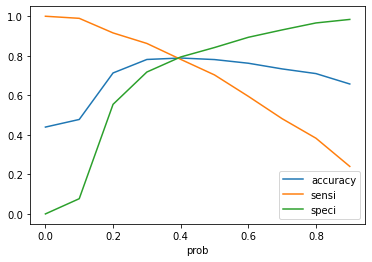

In [154]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

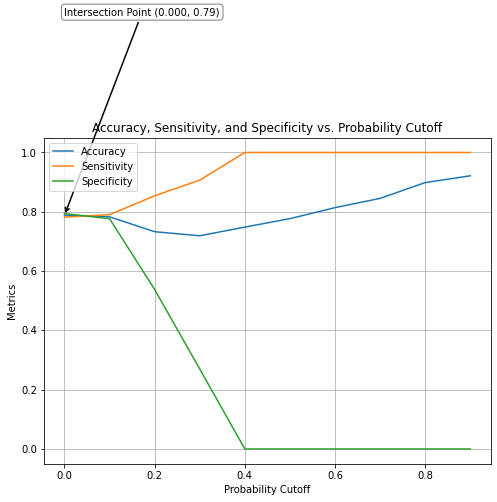

In [193]:
# Create an empty DataFrame to store cutoff-related metrics
cutoff_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

# Define a range of probability cutoff values
cutoff_values = np.arange(0.0, 1.0, 0.1)

# Initialize an empty list to store individual DataFrames
data_frames = []

# Iterate through the cutoff values
for cutoff in cutoff_values:
    # Create a mask to filter rows based on the current cutoff
    mask = y_train_pred_final['Predicted_Converted_Prob'] >= cutoff
    
    # Calculate confusion matrix for the filtered data
    confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Actual_Converted'][mask], y_train_pred_final['Predicted'][mask])
    total = np.sum(confusion_matrix)
    
    # Calculate accuracy, sensitivity, and specificity for the current cutoff
    accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / total
    sensitivity = confusion_matrix[1, 1] / (confusion_matrix[1, 0] + confusion_matrix[1, 1])
    specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
    
    # Create a DataFrame for the current cutoff and append it to the list
    cutoff_data = pd.DataFrame({'Probability': [cutoff], 'Accuracy': [accuracy], 'Sensitivity': [sensitivity], 'Specificity': [specificity]})
    data_frames.append(cutoff_data)

# Concatenate all individual DataFrames into the cutoff_df
cutoff_df = pd.concat(data_frames, ignore_index=True)

# Plot the accuracy, sensitivity, and specificity curves
plt.figure(figsize=(8, 6))
plt.plot(cutoff_df['Probability'], cutoff_df['Accuracy'], label='Accuracy')
plt.plot(cutoff_df['Probability'], cutoff_df['Sensitivity'], label='Sensitivity')
plt.plot(cutoff_df['Probability'], cutoff_df['Specificity'], label='Specificity')

# Find the intersection points of Sensitivity-Accuracy and Specificity-Accuracy curves
sensitivity_accuracy_intersection = cutoff_df.iloc[(cutoff_df['Sensitivity'] - cutoff_df['Accuracy']).abs().argsort()[:1]]
specificity_accuracy_intersection = cutoff_df.iloc[(cutoff_df['Specificity'] - cutoff_df['Accuracy']).abs().argsort()[:1]]

# Calculate the average of the two intersection points
intersection_x = (float(sensitivity_accuracy_intersection['Probability']) + float(specificity_accuracy_intersection['Probability'])) / 2

# Annotate the plot with the intersection point coordinates
plt.annotate(f'Intersection Point ({intersection_x:.3f}, {float(sensitivity_accuracy_intersection["Accuracy"]):.2f})',
             xy=(intersection_x, float(sensitivity_accuracy_intersection['Accuracy'])),
             xytext=(0, 200),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', lw=1.5),
             fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="grey", facecolor="white"))

# Add labels and legend
plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics')
plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoff')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


We have identified the approximate optimal cutoff point for the probability threshold at 0.79, where all the curves meet. This can be considered as the threshold for classifying positive and negative cases in your model. Setting the threshold at 0.79 will provide a good balance between accuracy, sensitivity, and specificity based on your analysis.

We can use this optimal cutoff point when making predictions on new data or evaluating the performance of your logistic regression model.

# Precision and recall tradeoff

In [156]:
y_train_pred_final.Actual_Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       0
 3       1
 4       1
        ..
 4097    1
 4098    1
 4099    1
 4100    1
 4101    0
 Name: Actual_Converted, Length: 4102, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       1
        ..
 4097    0
 4098    1
 4099    1
 4100    1
 4101    0
 Name: Predicted, Length: 4102, dtype: int64)

In [157]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual_Converted, y_train_pred_final.Predicted_Converted_Prob)

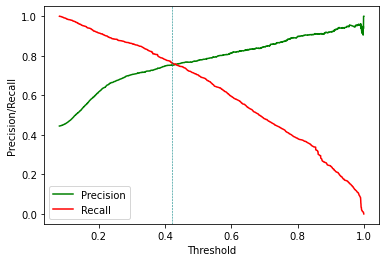

In [158]:
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.axvline(x=0.42, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.show()

The threshold value where the curves intersect represents the point at which the model strikes a balance between precision and recall. This threshold can be customized to align with specific business requirements.

In [159]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Predicted_Converted_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Actual_Converted,Predicted_Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.877195,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.621520,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.161572,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.090703,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.508368,1,1,1,1,1,1,1,0,0,0,0,1


In [160]:
# Let's checking the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Actual_Converted, y_train_pred_final.final_predicted)

0.7854705021940517

In [161]:
# Let's creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Actual_Converted, y_train_pred_final.final_predicted )
confusion2

array([[1870,  430],
       [ 450, 1352]], dtype=int64)

In [162]:
# Let's evaluate the other metrics as well

true_positives = confusion[1, 1]
false_negatives = confusion[1, 0]
true_negatives = confusion[0, 0]
false_positives = confusion[0, 1]

In [163]:
#Precision
true_positives/(true_positives+false_positives)


0.7482740308019118

In [164]:
#Recall

true_positives/(true_positives+false_negatives)


0.7819089900110988

# Test Data

In [165]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 7412 to 78
Data columns (total 54 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   TotalVisits                                       1758 non-null   float64
 1   Total Time Spent on Website                       1758 non-null   int64  
 2   Page Views Per Visit                              1758 non-null   float64
 3   Lead Origin_Landing Page Submission               1758 non-null   uint8  
 4   Lead Origin_Lead Add Form                         1758 non-null   uint8  
 5   Lead Origin_Lead Import                           1758 non-null   uint8  
 6   Lead Origin_Quick Add Form                        1758 non-null   uint8  
 7   Lead Source_Facebook                              1758 non-null   uint8  
 8   Lead Source_Google                                1758 non-null   uint8  
 9   Lead Source_Olark 

In [166]:
X_test = X_test.T.drop_duplicates().T 
print(len(X_test.columns))

45


# Prediction on Test Dataset using final model 

In [167]:
# Adding contant value
X_test.shape
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(1758, 46)

In [168]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7412,1.0,2.0,890.0,2.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1749,1.0,2.0,1188.0,1.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7782,1.0,3.0,360.0,3.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7751,1.0,3.0,477.0,3.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8638,1.0,4.0,141.0,4.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7893,1.0,9.5,1845.0,2.71,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7190,1.0,4.0,666.0,2.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3440,1.0,4.0,126.0,4.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7018,1.0,5.0,1763.0,1.67,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
num_cols = X_test_sm.iloc[:,1:].select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Current_occupation_Housewife', 'Current_occupation_Other',
       'Current_occupation_Student', 'Current_occupation_Unemployed',
       'Current_occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_

In [170]:
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7412,1.0,2.0,890.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1749,1.0,2.0,1188.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7782,1.0,3.0,360.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7751,1.0,3.0,477.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8638,1.0,4.0,141.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
rfe_col = set(rfe_col)
print(rfe_col)

{'Specialization_Banking, Investment And Insurance', 'TotalVisits', 'Specialization_Business Administration', 'Specialization_Human Resource Management', 'Current_occupation_Unemployed', 'Total Time Spent on Website', 'Specialization_International Business', 'Current_occupation_Student', 'Specialization_Services Excellence', 'Specialization_E-Business', 'Specialization_Media and Advertising', 'Lead Source_Referral Sites', 'Current_occupation_Working Professional', 'Lead Source_Olark Chat', 'Lead Origin_Landing Page Submission', 'Specialization_Marketing Management', 'Specialization_Healthcare Management', 'Specialization_Operations Management', 'Page Views Per Visit', 'Specialization_Retail Management', 'Lead Source_Google', 'Specialization_Rural and Agribusiness', 'Lead Origin_Lead Add Form', 'Specialization_Hospitality Management', 'Lead Source_Organic Search', 'Specialization_E-COMMERCE', 'Lead Source_Reference', 'Specialization_IT Projects Management', 'const'}


In [172]:
new_dt = X_test_sm[rfe_col]
new_dt = new_dt.T.drop_duplicates().T
print(len(new_dt.columns))

29


In [173]:
X_test_sm = X_test_sm[rfe_col].T.drop_duplicates().T 
print(len(X_test_sm.columns))

29


In [174]:
print(X_test_sm.columns)

Index(['Specialization_Banking, Investment And Insurance', 'TotalVisits',
       'Specialization_Business Administration',
       'Specialization_Human Resource Management',
       'Current_occupation_Unemployed', 'Total Time Spent on Website',
       'Specialization_International Business', 'Current_occupation_Student',
       'Specialization_Services Excellence', 'Specialization_E-Business',
       'Specialization_Media and Advertising', 'Lead Source_Referral Sites',
       'Current_occupation_Working Professional', 'Lead Source_Olark Chat',
       'Lead Origin_Landing Page Submission',
       'Specialization_Marketing Management',
       'Specialization_Healthcare Management',
       'Specialization_Operations Management', 'Page Views Per Visit',
       'Specialization_Retail Management', 'Lead Source_Google',
       'Specialization_Rural and Agribusiness', 'Lead Origin_Lead Add Form',
       'Specialization_Hospitality Management', 'Lead Source_Organic Search',
       'Specializati

In [175]:
X_test_sm

,"Specialization_Banking, Investment And Insurance",TotalVisits,Specialization_Business Administration,Specialization_Human Resource Management,Current_occupation_Unemployed,Total Time Spent on Website,Specialization_International Business,Current_occupation_Student,Specialization_Services Excellence,Specialization_E-Business,Specialization_Media and Advertising,Lead Source_Referral Sites,Current_occupation_Working Professional,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,Specialization_Marketing Management,Specialization_Healthcare Management,Specialization_Operations Management,Page Views Per Visit,Specialization_Retail Management,Lead Source_Google,Specialization_Rural and Agribusiness,Lead Origin_Lead Add Form,Specialization_Hospitality Management,Lead Source_Organic Search,Specialization_E-COMMERCE,Lead Source_Reference,Specialization_IT Projects Management,const
7412,0.0,2.0,0.0,0.0,0.0,890.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1749,0.0,2.0,0.0,0.0,0.0,1188.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7782,0.0,3.0,0.0,0.0,1.0,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7751,0.0,3.0,0.0,1.0,1.0,477.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8638,0.0,4.0,0.0,1.0,1.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7893,0.0,9.5,0.0,0.0,0.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.71,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7190,0.0,4.0,0.0,1.0,1.0,666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3440,0.0,4.0,0.0,0.0,1.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7018,0.0,5.0,0.0,0.0,1.0,1763.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [178]:
len(X_test_sm.columns)

29

In [179]:
# making prediction using model 9 (final model)
# X_test_sm.shape

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7412    1.0
1749    1.0
7782    1.0
7751    1.0
8638    1.0
3517    1.0
1973    1.0
7601    1.0
1742    1.0
8259    1.0
dtype: float64

In [180]:
# Apply a threshold of 0.5 to convert probabilities to binary predictions
y_test_pred_binary = (y_test_pred >= 0.44).astype(int)

# Display the first 10 binary predictions
print(y_test_pred_binary[:20])

7412    1
1749    1
7782    1
7751    1
8638    1
3517    1
1973    1
7601    1
1742    1
8259    1
6770    1
1963    1
7185    1
2236    1
5773    1
3023    1
4737    1
4048    1
1823    1
7387    1
dtype: int32


In [181]:
# Create a DataFrame for predicted probabilities
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
7412,1.0
1749,1.0
7782,1.0
7751,1.0
8638,1.0


In [182]:
# Create a DataFrame from y_test
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
7412,1
1749,0
7782,0
7751,0
8638,1


In [183]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Resetting index for both dataframes
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred], axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,7412,1.0
1,0,1749,1.0
2,0,7782,1.0
3,0,7751,1.0
4,1,8638,1.0


In [184]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns={0: 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_Prob']]

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,7412,1,1.0
1,1749,0,1.0
2,7782,0,1.0
3,7751,0,1.0
4,8638,1,1.0


In [185]:
# taking sensitivity-specificity method at 0.44 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > .44 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,7412,1,1.0,1
1,1749,0,1.0,1
2,7782,0,1.0,1
3,7751,0,1.0,1
4,8638,1,1.0,1


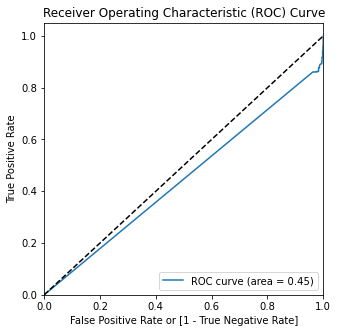

In [186]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

Note: An area under the ROC curve (AUC) value of 0.45 out of 1 suggests that the predictive model has room for improvement in its predictive ability.

Additionally, after generating the final predictions, the next crucial step involves assessing the model's performance on a test dataset. This evaluation entails comparing the predicted labels (final_predicted) with the actual labels (Converted) to calculate various performance metrics, including accuracy, precision, recall, and more.

# Model Evaluation on the Test Set

Computing various metrics using the confusion matrix for the test set

In [187]:
# Calculate the confusion matrix for 'y_train_pred_final' dataframe
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*" * 50, "\n")

# Print the confusion matrix
print("Confusion Matrix")
print(confusion_matrix)
print("*" * 50, "\n")

# Calculate and display various metrics using a user-defined function for logistic regression
def calculate_logreg_metrics(confusion_matrix):
    TN, FP, FN, TP = confusion_matrix.ravel()

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1_score = (2 * precision * recall) / (precision + recall)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Specificity:", specificity)
    print("F1 Score:", f1_score)

# Calculate and display metrics
print("Metrics for Logistic Regression Model:")
calculate_logreg_metrics(confusion_matrix)

print("\n")
print("*" * 50, "\n")

************************************************** 

Confusion Matrix
[[  7 961]
 [ 85 705]]
************************************************** 

Metrics for Logistic Regression Model:
Accuracy: 0.4050056882821388
Precision: 0.42316926770708285
Recall: 0.8924050632911392
Specificity: 0.007231404958677686
F1 Score: 0.5741042345276874


************************************************** 



In [188]:
# features and their coefficicent from final model
parameters=res.params.sort_values(ascending=False)
parameters

Total Time Spent on Website                         4.359174
Lead Origin_Lead Add Form                           4.121778
Current_occupation_Working Professional             1.615830
Lead Source_Referral Sites                          1.461708
Lead Source_Olark Chat                              0.969897
TotalVisits                                         0.937915
Lead Source_Google                                  0.356933
Specialization_Banking, Investment And Insurance    0.241294
Specialization_Operations Management                0.226007
Lead Source_Organic Search                          0.108968
Specialization_IT Projects Management               0.101790
Specialization_Healthcare Management                0.097303
Specialization_Marketing Management                 0.064809
Specialization_Business Administration             -0.010753
Specialization_Media and Advertising               -0.027521
Specialization_Human Resource Management           -0.060706
Specialization_E-Busines

NOTE: A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

Introducing a "Lead Score" feature to the test dataframe entails assigning a numerical score to each lead. A higher score indicates that the lead is more likely to convert, signifying its "hot" or promising nature. Conversely, a lower score suggests that the lead is less likely to convert, categorizing it as "cold" or having lower conversion potential.

In [189]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,7412,1,1.0,1,100
1,1749,0,1.0,1,100
2,7782,0,1.0,1,100
3,7751,0,1.0,1,100
4,8638,1,1.0,1,100


In [190]:
# Check the 'Converted_Prob' column
print(y_pred_final['Converted_Prob'].head())

# Check the data type of the 'Converted_Prob' column
print(y_pred_final['Converted_Prob'].dtype)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Converted_Prob, dtype: float64
float64


In [194]:
# Scale probabilities to a 0-100 range
y_pred_final['Lead_Score'] = (y_pred_final['Converted_Prob'] *100).astype(int)

# Display the first few rows of y_pred_final with scaled scores
y_pred_final.head(10)

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,7412,1,1.0,1,100
1,1749,0,1.0,1,100
2,7782,0,1.0,1,100
3,7751,0,1.0,1,100
4,8638,1,1.0,1,100
5,3517,0,1.0,1,100
6,1973,1,1.0,1,100
7,7601,0,1.0,1,100
8,1742,0,1.0,1,100
9,8259,0,1.0,1,100


In [192]:
# y_pred_final['Converted']
y_pred_final.groupby(['Converted']).count()
##out of 1758, 968 0's and 790 1's are there

,Prospect ID,Converted_Prob,final_predicted,Lead_Score
Converted,,,,
0,968,968,968,968
1,790,790,790,790
